<a href="https://colab.research.google.com/github/FeliciaHester/Capstone-Marketing-Segmentation/blob/main/1_21_25_Copy_of_Capstone_Marketing_Campaign_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



---



## **Problem Definition**



### **The Context:**

 In order for marketing efforts to be successful and have a better return on investment, a company must have an understanding of certain aspects of who their customer is. Understanding the customer is a critical part of the marketing operations of any business or organization because it has a direct consequence on sales and what marketing strategies the company needs to implement.


### **The objective:**

 The goal of this analysis is to better understand the customer and come up with the best possible customer segments using the information extracted from the dataset.



### **The key questions:**

Key questions that need to be answered:

- What are the customers' behaviors, characteristics, unique needs, and motivations?
- Segment customers specifically with email in mind.
- Customer segment has huge impact on email engagement.
- What customers fall into what categories for our segmented email campaigns?
- What personalized communications and offerings can we cater to their interests?


### **The problem formulation**:

Use past information to learn about customer engagement with various marketing activities, both above the line activities and below the line campaigns, and targeted personalized offers. The past information will be used to create the best possible cutomer segments to use in marketing in the future.  

customer profiles
campaign conversion rates
information associated with various marketing channels

Using unsupervised learning techniques, such as dimensionality reduction and clustering, come up with best possible customer segments within the dataset.




------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** The data was collected in the year 2016.

### **Loading Libraries**

In [ ]:
# need sklearn_extra
!pip install scikit-learn-extra


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist


# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

import pandas as pd
from IPython.display import display

from IPython.display import display_html

import io


# To supress warnings
import warnings

warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.7 MB/s eta 0:00:00


# **1. Load the original CSV data & name it original_data**
# **2. Make a copy of the data and name it filtered_data**
# **3. Check the info and shape of both to make sure they match**


In [ ]:
# load the original data from the file and # Replace with my file path
original_data = pd.read_csv('/content/drive/MyDrive/CSVs for Colab/marketing_campaign.csv')
# original_data contains the unfiltered data
print("Original data shape:", original_data.shape)


# Create a copy for filtering
filtered_data = original_data.copy()
# ... (Your outlier filtering logic, applied to filtered_data) ...
print("Filtered data shape:", filtered_data.shape)


def get_info_table(df):
    """
    Extracts #, column, count, non-null, and dtype from df.info()
    and returns it as an HTML table string.
    """
    info_buffer = io.StringIO()
    df.info(buf=info_buffer)  # Get full info output
    info_lines = info_buffer.getvalue().split('\n')

    # Extract relevant lines (data rows) and column headers
    data_rows = [line.strip().split() for line in info_lines[3:-2]]  # Skip header and footer
    header_row = ["#", "Column", "Count", "Non-Null", "Dtype"]

    # Create HTML table string
    html_table = "<table><thead><tr>"
    for header in header_row:
        html_table += f"<th>{header}</th>"
    html_table += "</tr></thead><tbody>"
    for row in data_rows:
        html_table += "<tr>"
        for cell in row:
            html_table += f"<td>{cell}</td>"
        html_table += "</tr>"
    html_table += "</tbody></table>"
    return html_table

# Get HTML tables for both DataFrames
original_info_table = get_info_table(original_data)
filtered_info_table = get_info_table(filtered_data)

# Display side-by-side with a line in between using HTML and CSS
display_html(f"<div style='display: flex;'><div style='flex: 1; border-right: 1px solid black;'>{original_info_table}</div><div style='flex: 1;'>{filtered_info_table}</div></div>", raw=True)

Original data shape: (2240, 27)
Filtered data shape: (2240, 27)


# Column Count Non-Null Dtype # Column Non-Null Count Dtype --- ------ -------------- ----- 0 ID 2240 non-null int64 1 Year_Birth 2240 non-null int64 2 Education 2240 non-null object 3 Marital_Status 2240 non-null object 4 Income 2216 non-null float64 5 Kidhome 2240 non-null int64 6 Teenhome 2240 non-null int64 7 Dt_Customer 2240 non-null object 8 Recency 2240 non-null int64 9 MntWines 2240 non-null int64 10 MntFruits 2240 non-null int64 11 MntMeatProducts 2240 non-null int64 12 MntFishProducts 2240 non-null int64 13 MntSweetProducts 2240 non-null int64 14 MntGoldProds 2240 non-null int64 15 NumDealsPurchases 2240 non-null int64 16 NumWebPurchases 2240 non-null int64 17 NumCatalogPurchases 2240 non-null int64 18 NumStorePurchases 2240 non-null int64 19 NumWebVisitsMonth 2240 non-null int64 20 AcceptedCmp3 2240 non-null int64 21 AcceptedCmp4 2240 non-null int64 22 AcceptedCmp5 2240 non-null int64 23 AcceptedCmp1 2240 non-null int64 24 AcceptedCmp2 2240 non-null int64 25 Complain 2240 non-null int64 26 Response 2240 non-null int64 dtypes: float64(1), int64(23), object(3) # Column Count Non-Null Dtype # Column Non-Null Count Dtype --- ------ -------------- ----- 0 ID 2240 non-null int64 1 Year_Birth 2240 non-null int64 2 Education 2240 non-null object 3 Marital_Status 2240 non-null object 4 Income 2216 non-null float64 5 Kidhome 2240 non-null int64 6 Teenhome 2240 non-null int64 7 Dt_Customer 2240 non-null object 8 Recency 2240 non-null int64 9 MntWines 2240 non-null int64 10 MntFruits 2240 non-null int64 11 MntMeatProducts 2240 non-null int64 12 MntFishProducts 2240 non-null int64 13 MntSweetProducts 2240 non-null int64 14 MntGoldProds 2240 non-null int64 15 NumDealsPurchases 2240 non-null int64 16 NumWebPurchases 2240 non-null int64 17 NumCatalogPurchases 2240 non-null int64 18 NumStorePurchases 2240 non-null int64 19 NumWebVisitsMonth 2240 non-null int64 20 AcceptedCmp3 2240 non-null int64 21 AcceptedCmp4 2240 non-null int64 22 AcceptedCmp5 2240 non-null int64 23 AcceptedCmp1 2240 non-null int64 24 AcceptedCmp2 2240 non-null int64 25 Complain 2240 non-null int64 26 Response 2240 non-null int64 dtypes: float64(1), int64(23), object(3)

#### **Observations and Insights: 2240 rows (observations / instances) & 27 columns**
## All data types are correct. Both data sets match.

### **Understand the data by observing a few rows**

In [ ]:
# View first 5 rows
display(filtered_data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
# View last 5 rows Hint: Use tail() method
display(filtered_data.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,1,4,7,0,0,0,0,0,0,1


#### **Observations and Insights: birth between 46 & 84, Grad - Phd - Master, married - single -together - divorced, income between 26,645 (1984) & 71,613, none to 2 kids home - 2 = 1946 (caring for grandkids), teens home 0 - 1 (54,67,46,56,54 - caring for grandkids), dt enrolled w/ co 2012 - 2014 / 1st Q = 5, 2nd Q = 2, 3 Q = 1, 4 Q = 1 (taper off enrollment from Q1 - Q4), recency days since last purch 8 (1 teen home, 1956, master, 69k, 428 in wine) 94 (81, phd, 1 child, 58k, 173 wine), catalog purch (most all on low end) 0 (1984, 1 child, lowest inc) - 10 (1957, 58k, single, 635 wine, 58 days sice last) buy ? catalog (catalog to instore ratio), store purch 2 - 13 (look at enrollment date and see instore purch over lifetime),visit /mo 3 - 7 (look at visit to in store purch ratio), 3rd campaign = 0 accepts, 4th = 1 accept, 5th = 0, 1st = 1, 2nd = 0, complaints = 0, camp resp accepted = 0 (they didn't accept camp 1-5) (camp 6 must be the last camp, which they accepted offer, which isn't listed)  **

In [ ]:
#number of unique values in each column.
filtered_data.nunique()


,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


# Observations
Year_Birth	59   (broad customer age range)
Education	5   (not relevant to looking at habits)(decision tree)
Marital_Status	8    (narrow down categories)
Income	1974    (use this in range form)
Kidhome	3       (0 - 2 range)
Teenhome	3      (0 - 2 range)
Dt_Customer	663  (look at oldest and habits vs new enrolls and habits)
Recency	100       (use this for an avg)
MntWines	776      (use this for an avg)
MntFruits	158      (use this for an avg)
MntMeatProducts	558  (use this for an avg)
MntFishProducts	182   (use this for an avg)
MntSweetProducts	177   (use this for an avg)
MntGoldProds	213      (use this for an avg)
NumDealsPurchases	15   (use this for avg / range / in ration to)
NumWebPurchases	15      (use this for avg / range / in ration to)
NumCatalogPurchases	14  (use this for avg / range / in ration to)
NumStorePurchases	14    (use this for avg / range / in ration to)
NumWebVisitsMonth	16     (use this for avg / range / in ration to)
AcceptedCmp3	2  (0 or 1 - not relevant to looking at habits)(decision tree)
AcceptedCmp4	2  (0 or 1 - not relevant to looking at habits)(decision tree)   
AcceptedCmp5	2  (0 or 1 - not relevant to looking at habits)(decision tree)    
AcceptedCmp1	2  (0 or 1 - not relevant to looking at habits)(decision tree)    
AcceptedCmp2	2  (0 or 1 - not relevant to looking at habits)(decision tree)    
Complain	2      (0 or 1 - not relevant to looking at habits)(decision tree)    
Response	2       (0 or 1 - not relevant to looking at habits)(decision tree)  

### **Check missing values of each column**

In [ ]:
# Find the percentage of missing values in each column of the data
percent_missing = filtered_data.isnull().sum() * 100 / len(filtered_data)

#display the result
display(percent_missing)

,0
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000


##Observation

Can observe that `ID` has no null values. Also the number of unique values are equal to the number of observations. So, `ID` is an index for the data entry.

The goal is to segment customers into groups for marketing purposes. The ID column is the identifier per customer into their habits and makeup as a customer and may be useful.

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

Observations:Mean = average / low std = data is close to the avg / high std = data is far from avg / min = lowest in set / max = highest


-___ (category) ___ std is ___(high/low) ___ in comparison to the mean =  ___(what means for this category) ___

-Higher mean displacement ____(for category)_____correlates with ____(what does high indicate for this category) _____ = ___(what means for this category)___

- ___(category)___ has _____(low/high standard deviation)___ = suggests ____(what does this indicate for this category)___

- ___(category)___ avg is ___( # )___ with a max of ___( # )___ = ___(what does this indicate for this category)___



In [ ]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
numeric_summary = filtered_data.describe().round(2)


# Display the summary statistics
print(numeric_summary)

             ID  Year_Birth     Income  Kidhome  Teenhome  Recency  MntWines  \
count   2240.00     2240.00    2216.00  2240.00   2240.00  2240.00   2240.00   
mean    5592.16     1968.81   52247.25     0.44      0.51    49.11    303.94   
std     3246.66       11.98   25173.08     0.54      0.54    28.96    336.60   
min        0.00     1893.00    1730.00     0.00      0.00     0.00      0.00   
25%     2828.25     1959.00   35303.00     0.00      0.00    24.00     23.75   
50%     5458.50     1970.00   51381.50     0.00      0.00    49.00    173.50   
75%     8427.75     1977.00   68522.00     1.00      1.00    74.00    504.25   
max    11191.00     1996.00  666666.00     2.00      2.00    99.00   1493.00   

       MntFruits  MntMeatProducts  MntFishProducts  ...  NumCatalogPurchases  \
count    2240.00          2240.00          2240.00  ...              2240.00   
mean       26.30           166.95            37.53  ...                 2.66   
std        39.77           225.72      

## **Observations and Insights: **

24 cols of numeric vals shown of 27 - education , marital, and cusotmer since missing (not numeric value relevant to summary)

2240 observations - income has 2216 (the 1% missing)

### **Explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]


display(filtered_data[cols])


,Education,Marital_Status,Kidhome,Teenhome,Complain
0,Graduation,Single,0,0,0
1,Graduation,Single,1,1,0
2,Graduation,Together,0,0,0
3,Graduation,Together,1,0,0
4,PhD,Married,1,0,0
...,...,...,...,...,...
2235,Graduation,Married,0,1,0
2236,PhD,Together,2,1,0
2237,Graduation,Divorced,0,0,0
2238,Master,Together,0,1,0


# these categories can be used as decision tree categorical selection

**Number of unique observations in each category**

In [ ]:
# Specify the columns you want unique values for
columns_to_check = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

# Get unique values for each specified column
for column in columns_to_check:
  unique_values = filtered_data[column].unique()
  print("Unique values in", column, "are :")
  print(filtered_data[column].unique())
  print("*" * 50)

Unique values in Education are :
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
**************************************************
Unique values in Marital_Status are :
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
**************************************************
Unique values in Kidhome are :
[0 1 2]
**************************************************
Unique values in Teenhome are :
[0 1 2]
**************************************************
Unique values in Complain are :
[0 1]
**************************************************


#### **Observations and Insights: _____**
no missing customers in the categorical data 2240/2240

**Observations**

- Can observe from the summary statistics of categorical variables that the Education variable has 5 categories. Can combine some categories.

- There are 8 categories in Marital_Status with some categories having very low count of less than 5. Combine these categories with other categories.

### **Replace  the "2n Cycle" category with "Master" in Education and "Alone", "Absurd, and "YOLO" with "Single" in Marital_Status**

In [ ]:
# Replace the category "2n Cycle" with the category "Master"
#Use the replace() method and inplace=True
filtered_data["Education"].replace("2n Cycle", "Master", inplace=True)


In [ ]:
# Replace the categories "Alone", "Abusrd", "YOLO" with the category "Single"
filtered_data["Marital_Status"].replace(["Alone","Absurd","YOLO"], "Single", inplace=True)

# **Observations in the Date of the Customer's enrollment **
Already know there are 69 unique observations.
Want to know the enrollment count in each quarter to see if there is an pattern we can capitalize on


In [ ]:
# 1. Convert 'Dt_Customer' to datetime objects
# The original format '%d-%m-%y' was causing errors due to inconsistencies in the data.
# Using format='mixed' allows pandas to infer the format for each element individually.
# errors='coerce' will replace invalid dates with NaT (Not a Time) which can be handled later.
filtered_data['Dt_Customer'] = pd.to_datetime(filtered_data['Dt_Customer'], format='mixed', errors='coerce')

# 2. Extract the quarter
filtered_data['quarter'] = filtered_data['Dt_Customer'].dt.quarter

# 3. Count unique dates by quarter
unique_dates_by_quarter = filtered_data.groupby('quarter')['Dt_Customer'].nunique()

# 4. Print the results
print(unique_dates_by_quarter)

quarter
1    163
2    170
3    156
4    174
Name: Dt_Customer, dtype: int64


# **Check data sets**

In [ ]:
# original_data contains the unfiltered data
print("Original data shape:", original_data.shape)
# new filtered data set with above changes
print("Filtered data shape:", filtered_data.shape)

def get_info_table(df):
    """
    Extracts #, column, count, non-null, and dtype from df.info()
    and returns it as an HTML table string.
    """
    info_buffer = io.StringIO()
    df.info(buf=info_buffer)  # Get full info output
    info_lines = info_buffer.getvalue().split('\n')

    # Extract relevant lines (data rows) and column headers
    data_rows = [line.strip().split() for line in info_lines[3:-2]]  # Skip header and footer
    header_row = ["#", "Column", "Count", "Non-Null", "Dtype"]

    # Create HTML table string
    html_table = "<table><thead><tr>"
    for header in header_row:
        html_table += f"<th>{header}</th>"
    html_table += "</tr></thead><tbody>"
    for row in data_rows:
        html_table += "<tr>"
        for cell in row:
            html_table += f"<td>{cell}</td>"
        html_table += "</tr>"
    html_table += "</tbody></table>"
    return html_table

# Get HTML tables for both DataFrames
original_info_table = get_info_table(original_data)
filtered_info_table = get_info_table(filtered_data)

# Display side-by-side with a line in between using HTML and CSS
display_html(f"<div style='display: flex;'><div style='flex: 1; border-right: 1px solid black;'>{original_info_table}</div><div style='flex: 1;'>{filtered_info_table}</div></div>", raw=True)

Original data shape: (2240, 27)
Filtered data shape: (2240, 28)


# Column Count Non-Null Dtype # Column Non-Null Count Dtype --- ------ -------------- ----- 0 ID 2240 non-null int64 1 Year_Birth 2240 non-null int64 2 Education 2240 non-null object 3 Marital_Status 2240 non-null object 4 Income 2216 non-null float64 5 Kidhome 2240 non-null int64 6 Teenhome 2240 non-null int64 7 Dt_Customer 2240 non-null object 8 Recency 2240 non-null int64 9 MntWines 2240 non-null int64 10 MntFruits 2240 non-null int64 11 MntMeatProducts 2240 non-null int64 12 MntFishProducts 2240 non-null int64 13 MntSweetProducts 2240 non-null int64 14 MntGoldProds 2240 non-null int64 15 NumDealsPurchases 2240 non-null int64 16 NumWebPurchases 2240 non-null int64 17 NumCatalogPurchases 2240 non-null int64 18 NumStorePurchases 2240 non-null int64 19 NumWebVisitsMonth 2240 non-null int64 20 AcceptedCmp3 2240 non-null int64 21 AcceptedCmp4 2240 non-null int64 22 AcceptedCmp5 2240 non-null int64 23 AcceptedCmp1 2240 non-null int64 24 AcceptedCmp2 2240 non-null int64 25 Complain 2240 non-null int64 26 Response 2240 non-null int64 dtypes: float64(1), int64(23), object(3) # Column Count Non-Null Dtype # Column Non-Null Count Dtype --- ------ -------------- ----- 0 ID 2240 non-null int64 1 Year_Birth 2240 non-null int64 2 Education 2240 non-null object 3 Marital_Status 2240 non-null object 4 Income 2216 non-null float64 5 Kidhome 2240 non-null int64 6 Teenhome 2240 non-null int64 7 Dt_Customer 2240 non-null datetime64[ns] 8 Recency 2240 non-null int64 9 MntWines 2240 non-null int64 10 MntFruits 2240 non-null int64 11 MntMeatProducts 2240 non-null int64 12 MntFishProducts 2240 non-null int64 13 MntSweetProducts 2240 non-null int64 14 MntGoldProds 2240 non-null int64 15 NumDealsPurchases 2240 non-null int64 16 NumWebPurchases 2240 non-null int64 17 NumCatalogPurchases 2240 non-null int64 18 NumStorePurchases 2240 non-null int64 19 NumWebVisitsMonth 2240 non-null int64 20 AcceptedCmp3 2240 non-null int64 21 AcceptedCmp4 2240 non-null int64 22 AcceptedCmp5 2240 non-null int64 23 AcceptedCmp1 2240 non-null int64 24 AcceptedCmp2 2240 non-null int64 25 Complain 2240 non-null int64 26 Response 2240 non-null int64 27 quarter 2240 non-null int32 dtypes: datetime64[ns](1), float64(1), int32(1), int64(23), object(2)

In [ ]:
#check number of unique values in original column vs filtered column
def get_nunique_table(df):
    """
    Extracts column and nunique values from df.nunique()
    and returns it as an HTML table string.
    """
    nunique_series = df.nunique()

    # Create HTML table string
    html_table = "<table><thead><tr><th>Column</th><th>Unique Values</th></tr></thead><tbody>"
    for column, unique_count in nunique_series.items():
        html_table += f"<tr><td>{column}</td><td>{unique_count}</td></tr>"
    html_table += "</tbody></table>"
    return html_table

# Get HTML tables for both DataFrames
original_nunique_table = get_nunique_table(original_data)
filtered_nunique_table = get_nunique_table(filtered_data)

# Display side-by-side with a line in between using HTML and CSS
display_html(f"<div style='display: flex;'><div style='flex: 1; border-right: 1px solid black;'>{original_nunique_table}</div><div style='flex: 1;'>{filtered_nunique_table}</div></div>", raw=True)

Column,Unique Values
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


## **Univariate Analysis**
Use Univariate Analysis to explore each variable in the data set, separately. Look at the range of numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms help to visualize and describe numerical data. We can also use other plots like box plot to analyze the numerical columns.

#### Plot histogram for the feature 'Income' to understand the distribution and outliers, if any.

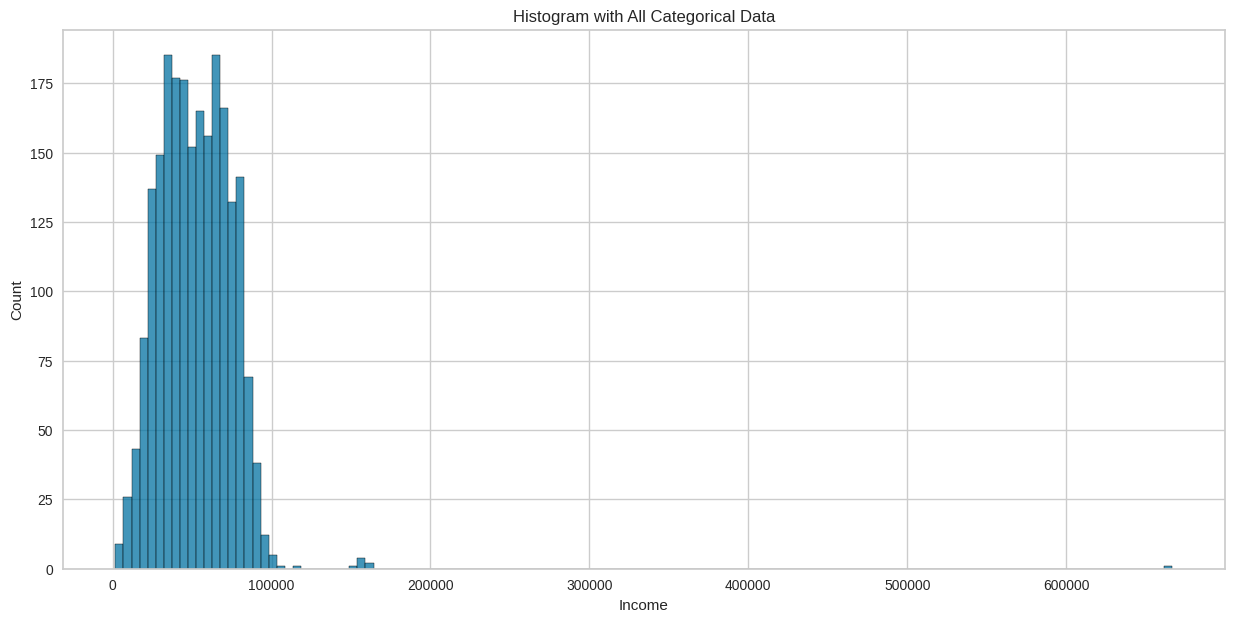

In [ ]:
# Create histogram for the Income feature

plt.figure(figsize=(15, 7))
sns.histplot(x='Income', data=filtered_data)
plt.title('Histogram with All Categorical Data')
plt.show()

** Observe some extreme value on the right side of the distribution of the 'Income' feature. Use a box plot to identify extreme values in the data.**

Text(0.5, 1.0, 'Boxplot with All Categorical Data')

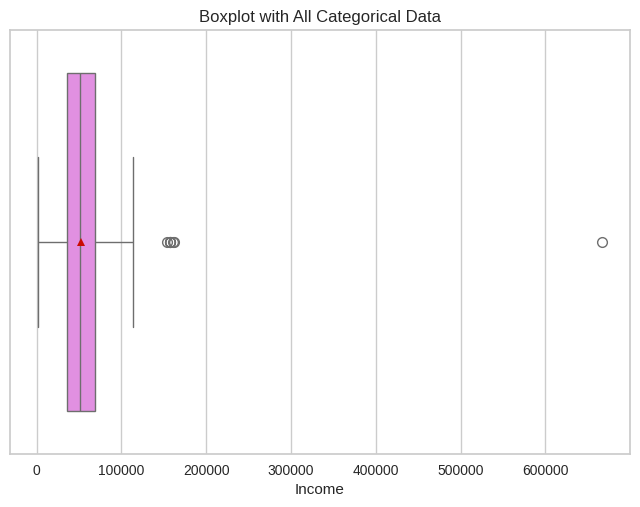

In [ ]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='Income', showmeans=True, color="violet")
plt.title('Boxplot with All Categorical Data')

#### **Observations and Insights:
customer income is large majority under 100k with most concentrated in 35k - 80k

**Observations**

There are only a few rows with extreme values for the Income variable.

Gather whisker and outlier information to make an informed decision as to remove the outliers or keep and analyze.




---

# **GATHER WHISKER AND OUTLIER INFORMATION**

In [ ]:
# Name the column name for this block of code
column_name = 'Income'


# Calculating the upper whisker for the variable
Q1 = filtered_data[column_name].quantile(q=0.25) # Finding the first quartile
Q3 = filtered_data[column_name].quantile(q=0.75) # Finding the third quartile
IQR = Q3 - Q1 # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR) # Calculating the Upper Whisker for the variable
lower_whisker = (Q1 - 1.5 * IQR) # Calculating the lower Whisker for the variable

# Identify outliers - this is creating a boolean mask
outliers = filtered_data[(filtered_data[column_name] > upper_whisker) | (filtered_data[column_name] < lower_whisker)]


# Printing Upper Whisker Limit
print(f"Upper Whisker Limit: {upper_whisker}")


# Check the 99.5% percentile value for the variable
majority_percentile_value = filtered_data[column_name].quantile(q=0.995)
# Print the percentage
print(f"99.5% of observations in '{column_name}' are under: {majority_percentile_value:}")


# Count outliers and total data points
num_outliers = len(outliers)
total_data_points = len(filtered_data)  # Assuming 'data' is your DataFrame
# Print the count of outliers out of the total observation count
print(f"Number of outliers in '{column_name}': {num_outliers} out of {total_data_points}")


# Calculate outlier percentage
outlier_percentage = (num_outliers / total_data_points) * 100
# Print the percentage
print(f"Outlier Percentage in '{column_name}': {outlier_percentage:.2f}%")


# Print outlier values - Changed to use outliers[column_name] to get the values
print(f"Outlier Values in '{column_name}': {outliers[column_name].tolist()}")

Upper Whisker Limit: 118350.5
99.5% of observations in 'Income' are under: 102145.75000000003
Number of outliers in 'Income': 8 out of 2240
Outlier Percentage in 'Income': 0.36%
Outlier Values in 'Income': [157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


# **MAKE AN OVERLAPPING HISTOGRAM TO SEE OUTLIERS**

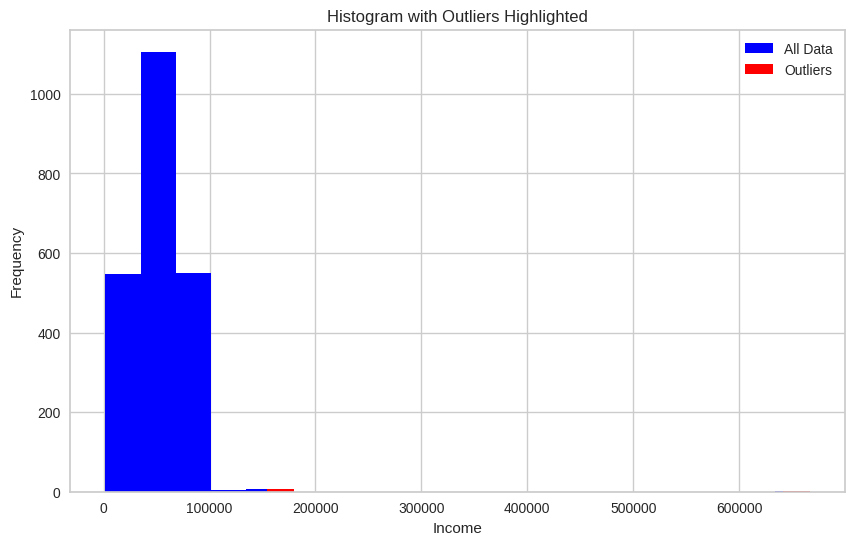

In [ ]:
# Plot a Histogram with the normal data and the outlier data layered on top in red to see if it is a significant amount of data in the outliers
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Income'], bins=20, color='blue', label='All Data')  # Histogram for all data
plt.hist(outliers['Income'], bins=20, color='red', label='Outliers')  # Overlay histogram for outliers # Changed this line to index the "MntWines" column of the outliers DataFrame directly
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram with Outliers Highlighted')
plt.legend()
plt.show()

#### **Observations and Insights: _____**
99.5% are below $102,145. The upper whisker is coming in at 118k. The outliers are beyond that range, so I am removing these 8 from the data set.





# **FILTER OUT THE OUTLIERS & MAKE A NEW HISTOGRAM**

Original data shape: (2240, 27)
Filtered data shape: (2232, 28)


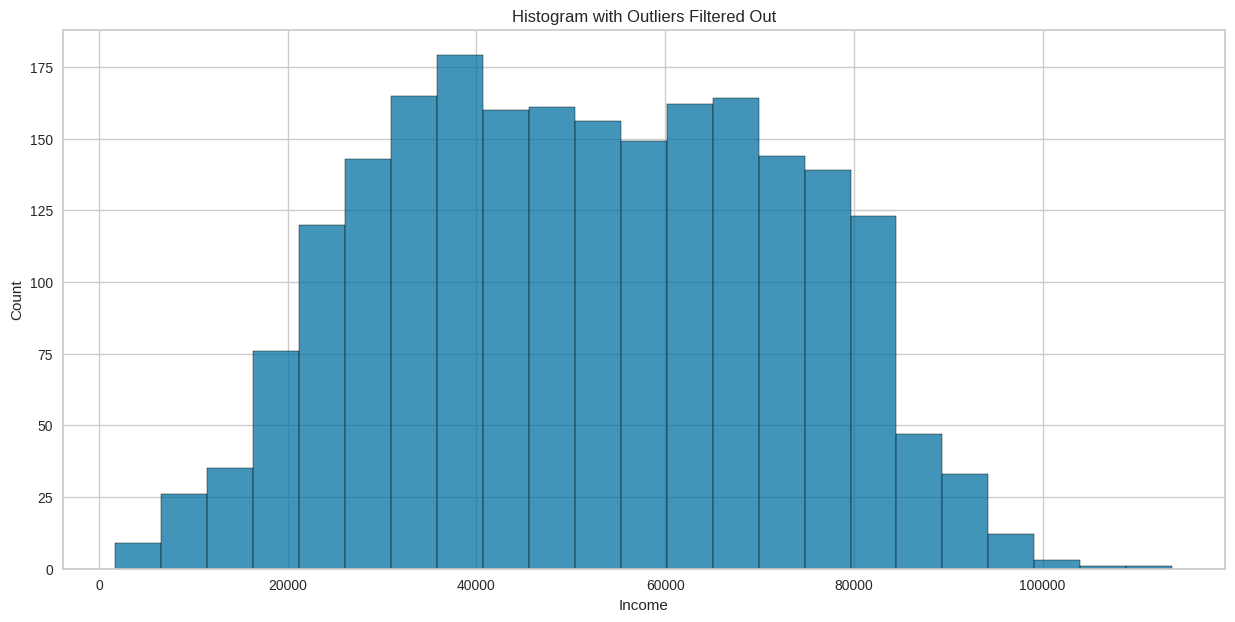

In [ ]:

#Previous code calculated upper_whisker and lower_whisker)

# Identify outliers for the 'Income' category
outliers = filtered_data[(filtered_data['Income'] > upper_whisker) | (filtered_data['Income'] < lower_whisker)]

# Apply filtering to the FILTERED data copy --- to keep only rows within the acceptable range of category listed
filtered_data = filtered_data[~filtered_data.index.isin(outliers.index)]

print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

# Plot new histogram
plt.figure(figsize=(15, 7))
sns.histplot(x='Income', data=filtered_data)
plt.title('Histogram with Outliers Filtered Out')
plt.show()

# **MAKE A NEW BOX PLOT**

Text(0.5, 1.0, 'Boxplot with Outliers Filtered Out')

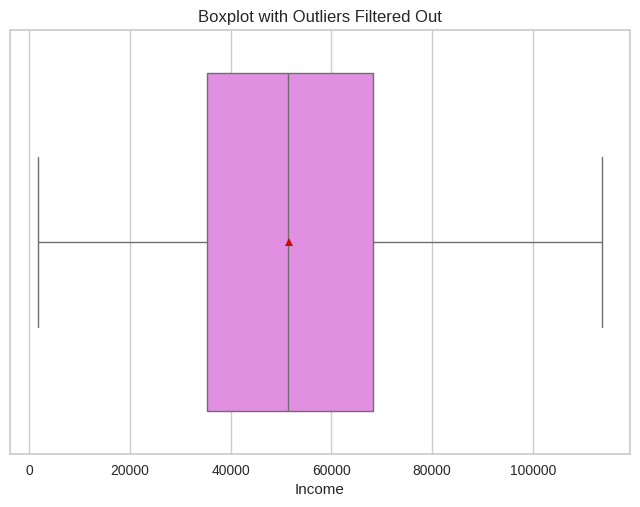

In [ ]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='Income', showmeans=True, color="violet")
plt.title('Boxplot with Outliers Filtered Out')

# **ENDING UNIVARIATE DATA CHECK**

In [ ]:
print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

Original data shape: (2240, 27)
Filtered data shape: (2232, 28)




---
# **NEW CATEGORY SET**


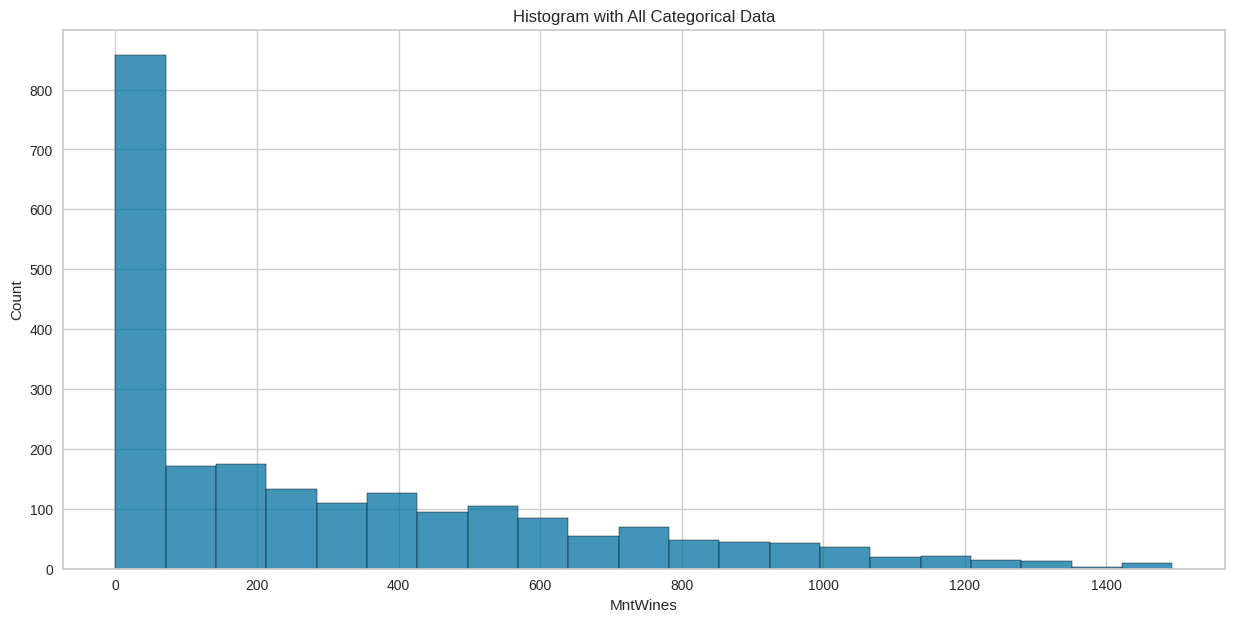

In [ ]:
# Plot the histogram for 'MntWines'
plt.figure(figsize=(15, 7))
sns.histplot(x='MntWines', data=filtered_data)
plt.title('Histogram with All Categorical Data')
plt.show()

Text(0.5, 1.0, 'Boxplot with All Categorical Data')

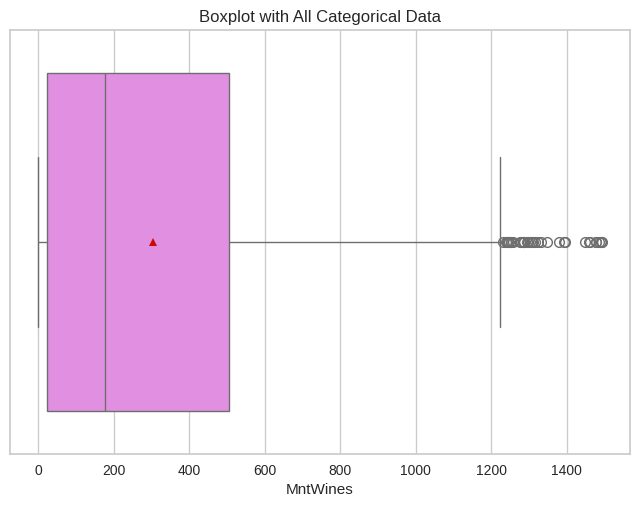

In [ ]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='MntWines', showmeans=True, color="violet")
plt.title('Boxplot with All Categorical Data')

# **GATHER WHISKER & OUTLIER INFORMATION**

In [ ]:
# Name the column name for this block of code
column_name = 'MntWines'

# Calculating the upper whisker for the variable
Q1 = filtered_data[column_name].quantile(q=0.25) # Finding the first quartile
Q3 = filtered_data[column_name].quantile(q=0.75) # Finding the third quartile
IQR = Q3 - Q1 # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR) # Calculating the Upper Whisker for the variable
lower_whisker = (Q1 - 1.5 * IQR) # Calculating the lower Whisker for the variable

# Identify outliers - this is creating a boolean mask
outliers = filtered_data[(filtered_data[column_name] > upper_whisker) | (filtered_data[column_name] < lower_whisker)]


# Printing Upper Whisker Limit
print(f"Upper Whisker Limit: {upper_whisker}")


# Check the 99.5% percentile value for the variable
majority_percentile_value = filtered_data[column_name].quantile(q=0.995)
# Print the percentage
print(f"99.5% of observations in '{column_name}' are under: {majority_percentile_value:}")


# Count outliers and total data points
num_outliers = len(outliers)
total_data_points = len(filtered_data)  # Assuming 'data' is your DataFrame
# Print the count of outliers out of the total observation count
print(f"Number of outliers in '{column_name}': {num_outliers} out of {total_data_points}")


# Calculate outlier percentage
outlier_percentage = (num_outliers / total_data_points) * 100
# Print the percentage
print(f"Outlier Percentage in '{column_name}': {outlier_percentage:.2f}%")


# Print outlier values - Changed to use outliers[column_name] to get the values
print(f"Outlier Values in '{column_name}': {outliers[column_name].tolist()}")

Upper Whisker Limit: 1226.5
99.5% of observations in 'MntWines' are under: 1374.349999999994
Number of outliers in 'MntWines': 35 out of 2232
Outlier Percentage in 'MntWines': 1.57%
Outlier Values in 'MntWines': [1332, 1349, 1241, 1285, 1248, 1239, 1396, 1288, 1379, 1478, 1492, 1492, 1279, 1308, 1478, 1253, 1394, 1296, 1285, 1230, 1315, 1298, 1302, 1449, 1259, 1252, 1459, 1493, 1324, 1285, 1462, 1276, 1245, 1486, 1311]


# **MAKE AN OVERLAPPING HISTOGRAM TO SEE OUTLIERS**

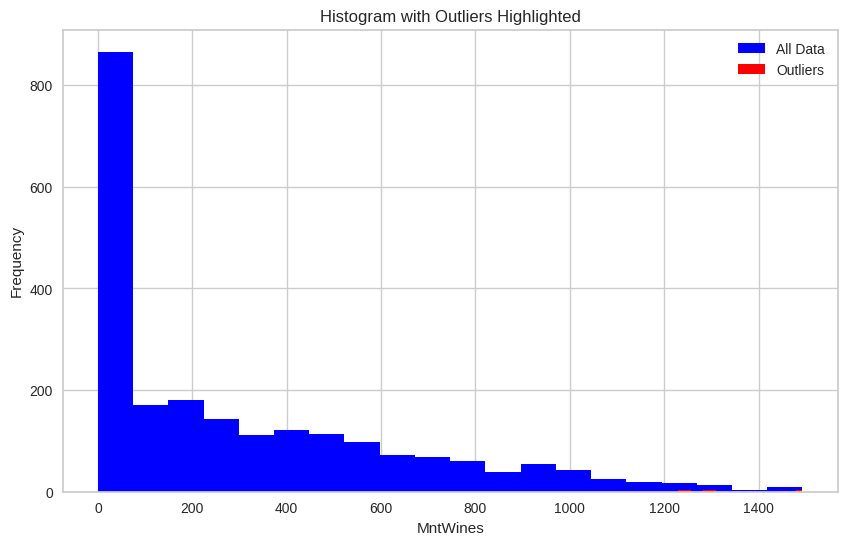

In [ ]:
# Plot a Histogram with the normal data and the outlier data layered on top in red to see if it is a significant amount of data in the outliers
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['MntWines'], bins=20, color='blue', label='All Data')  # Histogram for all data
plt.hist(outliers['MntWines'], bins=20, color='red', label='Outliers')  # Overlay histogram for outliers # Changed this line to index the "MntWines" column of the outliers DataFrame directly
plt.xlabel('MntWines')
plt.ylabel('Frequency')
plt.title('Histogram with Outliers Highlighted')
plt.legend()
plt.show()


 99.5% of data in this category is below 1374.35 and 1231.50 = upper limit of whisker. The outliers make up 34 rows of the 2240 and are close to the upper whisker so these outliers can be removed as they are similar to the majority of our data for this category.

# **FILTER OUT THE OUTLIERS & MAKE A NEW HISTOGRAM**

Original data shape: (2240, 27)
Filtered data shape: (2197, 28)


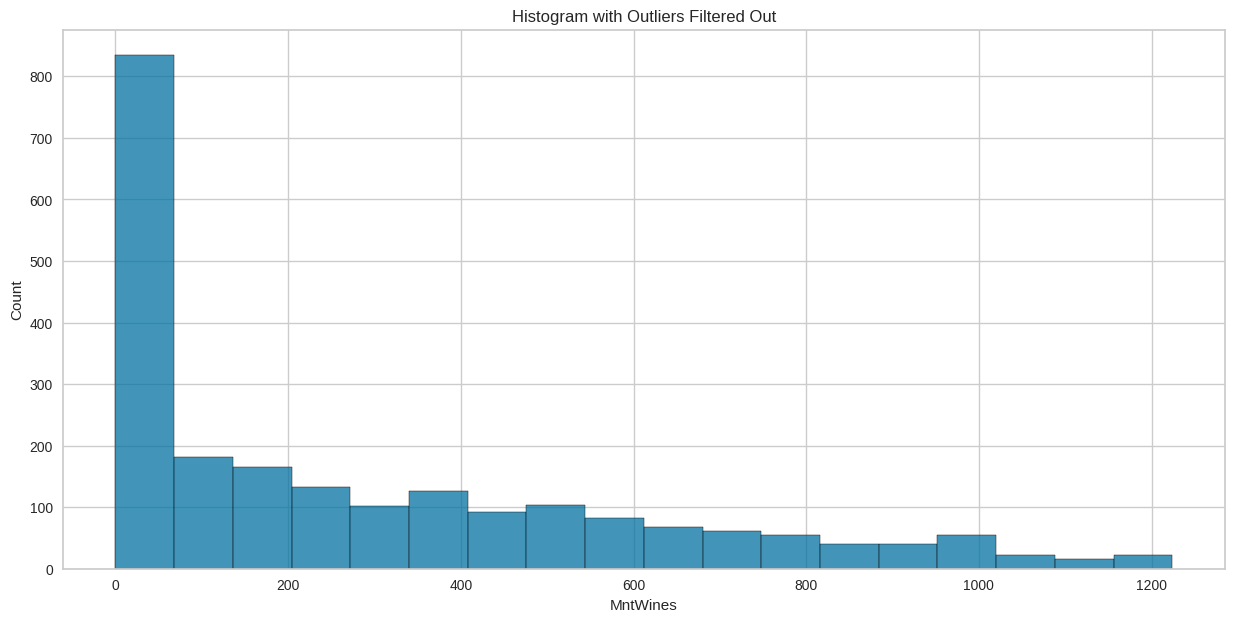

In [ ]:

#Previous code calculated upper_whisker and lower_whisker)

# Identify outliers for the 'Income' category
outliers = filtered_data[(filtered_data['MntWines'] > upper_whisker) | (filtered_data['MntWines'] < lower_whisker)]

# Apply filtering to the FILTERED data copy --- to keep only rows within the acceptable range of category listed
filtered_data = filtered_data[~filtered_data.index.isin(outliers.index)]

print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

# Plot new histogram
plt.figure(figsize=(15, 7))
sns.histplot(x='MntWines', data=filtered_data)
plt.title('Histogram with Outliers Filtered Out')
plt.show()

# **MAKE A NEW BOX PLOT**

Text(0.5, 1.0, 'Boxplot with Outliers Filtered Out')

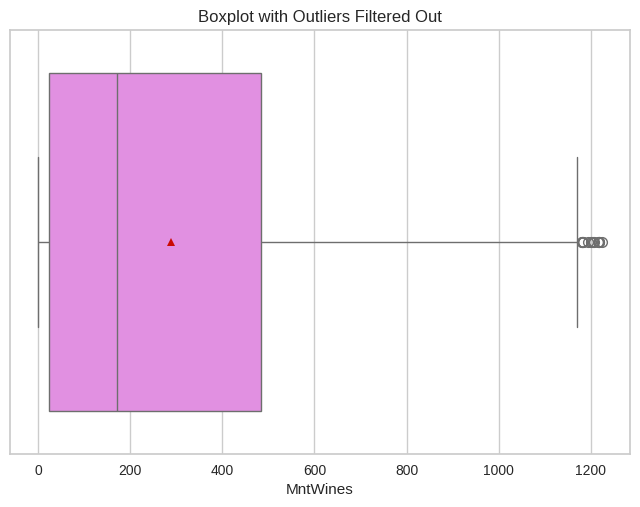

In [ ]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='MntWines', showmeans=True, color="violet")
plt.title('Boxplot with Outliers Filtered Out')

# **ENDING UNIVARIATE DATA CHECK**

In [ ]:
print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

Original data shape: (2240, 27)
Filtered data shape: (2197, 28)


# **Still have outliers so look at them again**

In [ ]:
# Name the column name for this block of code
column_name = 'MntWines'

# Calculating the upper whisker for the variable
Q1 = filtered_data[column_name].quantile(q=0.25) # Finding the first quartile
Q3 = filtered_data[column_name].quantile(q=0.75) # Finding the third quartile
IQR = Q3 - Q1 # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR) # Calculating the Upper Whisker for the variable
lower_whisker = (Q1 - 1.5 * IQR) # Calculating the lower Whisker for the variable

# Identify outliers - this is creating a boolean mask
outliers = filtered_data[(filtered_data[column_name] > upper_whisker) | (filtered_data[column_name] < lower_whisker)]


# Printing Upper Whisker Limit
print(f"Upper Whisker Limit: {upper_whisker}")

# Count outliers and total data points
num_outliers = len(outliers)
total_data_points = len(filtered_data)  # Assuming 'data' is your DataFrame
# Print the count of outliers out of the total observation count
print(f"Number of outliers in '{column_name}': {num_outliers} out of {total_data_points}")


# Calculate outlier percentage
outlier_percentage = (num_outliers / total_data_points) * 100
# Print the percentage
print(f"Outlier Percentage in '{column_name}': {outlier_percentage:.2f}%")


# Print outlier values - Changed to use outliers[column_name] to get the values
print(f"Outlier Values in '{column_name}': {outliers[column_name].tolist()}")


Upper Whisker Limit: 1173.0
Number of outliers in 'MntWines': 15 out of 2197
Outlier Percentage in 'MntWines': 0.68%
Outlier Values in 'MntWines': [1218, 1200, 1181, 1200, 1184, 1206, 1215, 1224, 1205, 1218, 1181, 1181, 1184, 1218, 1193]


# **filter them out **

In [ ]:
#Previous code calculated upper_whisker and lower_whisker)

# Identify outliers for the category
outliers = filtered_data[(filtered_data['MntWines'] > upper_whisker) | (filtered_data['MntWines'] < lower_whisker)]

# Apply filtering to the FILTERED data copy --- to keep only rows within the acceptable range of category listed
filtered_data = filtered_data[~filtered_data.index.isin(outliers.index)]

print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

Original data shape: (2240, 27)
Filtered data shape: (2182, 28)


# **New histogram post 2nd outlier filter**

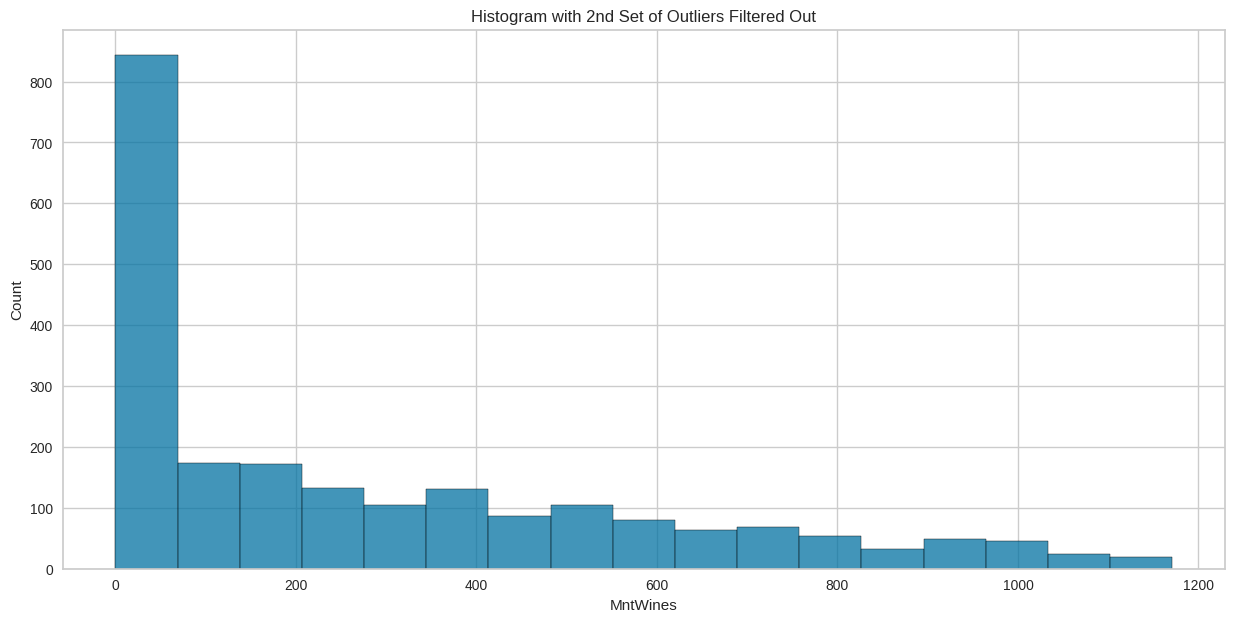

In [ ]:
# Plot new histogram
plt.figure(figsize=(15, 7))
sns.histplot(x='MntWines', data=filtered_data)
plt.title('Histogram with 2nd Set of Outliers Filtered Out')
plt.show()

# **New box plot - post 2nd outlier filtering **

Text(0.5, 1.0, 'Boxplot with 2nd Set of Outliers Filtered Out')

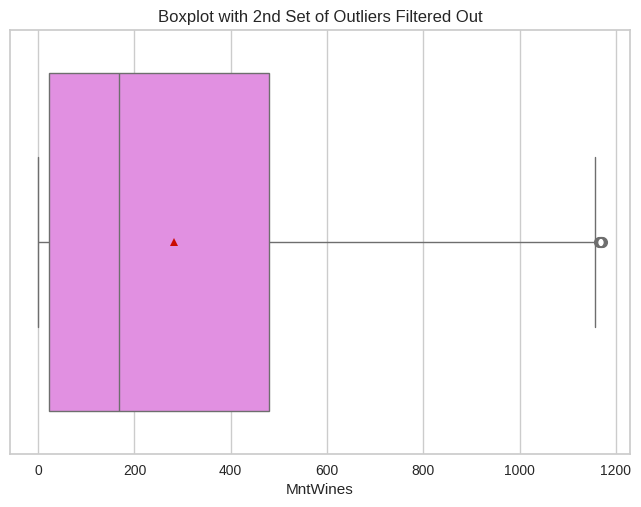

In [ ]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='MntWines', showmeans=True, color="violet")
plt.title('Boxplot with 2nd Set of Outliers Filtered Out')

# **ENDING UNIVARIATE DATA CHECK - POST 2ND OUTLIER FILTERING **

In [ ]:
print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

Original data shape: (2240, 27)
Filtered data shape: (2182, 28)




---


## **NEW CATEGORY SET**


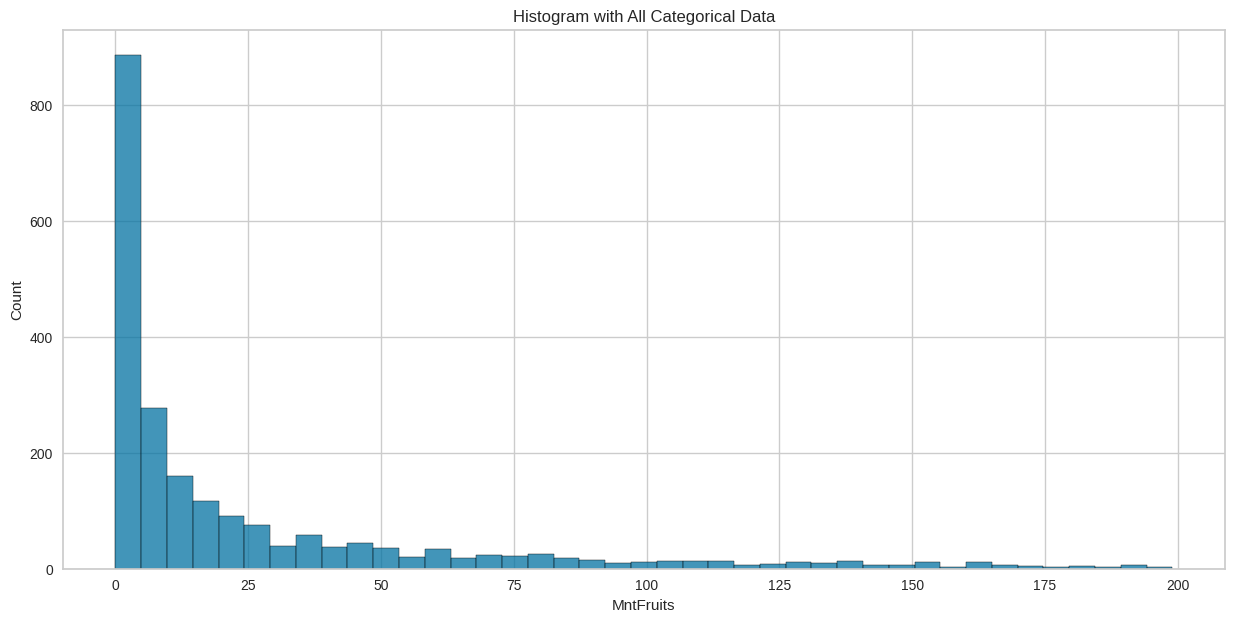

In [ ]:
# Plot the histogram for 'MntFruits'

plt.figure(figsize=(15, 7))
sns.histplot(x='MntFruits', data=filtered_data)
plt.title('Histogram with All Categorical Data')
plt.show()

Text(0.5, 1.0, 'Boxplot with All Categorical Data')

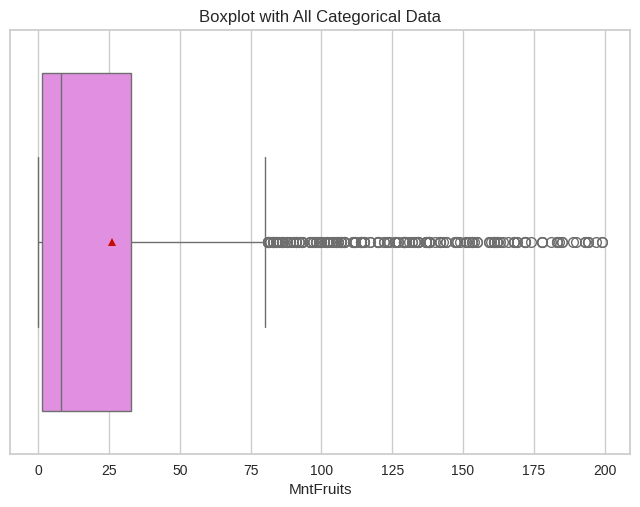

In [ ]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='MntFruits', showmeans=True, color="violet")
plt.title('Boxplot with All Categorical Data')

# **GATHER WHISKER & OUTLIER INFORMATION**

In [ ]:
# Name the column name for this block of code
column_name = 'MntFruits'

# Calculating the upper whisker for the variable
Q1 = filtered_data[column_name].quantile(q=0.25) # Finding the first quartile
Q3 = filtered_data[column_name].quantile(q=0.75) # Finding the third quartile
IQR = Q3 - Q1 # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR) # Calculating the Upper Whisker for the variable
lower_whisker = (Q1 - 1.5 * IQR) # Calculating the lower Whisker for the variable

# Identify outliers - this is creating a boolean mask
outliers = filtered_data[(filtered_data[column_name] > upper_whisker) | (filtered_data[column_name] < lower_whisker)]


# Printing Upper Whisker Limit
print(f"Upper Whisker Limit: {upper_whisker}")


# Check the 99.5% percentile value for the variable
majority_percentile_value = filtered_data[column_name].quantile(q=0.995)
# Print the percentage
print(f"99.5% of observations in '{column_name}' are under: {majority_percentile_value:}")


# Count outliers and total data points
num_outliers = len(outliers)
total_data_points = len(filtered_data)  # Assuming 'data' is your DataFrame
# Print the count of outliers out of the total observation count
print(f"Number of outliers in '{column_name}': {num_outliers} out of {total_data_points}")


# Calculate outlier percentage
outlier_percentage = (num_outliers / total_data_points) * 100
# Print the percentage
print(f"Outlier Percentage in '{column_name}': {outlier_percentage:.2f}%")


# Print outlier values - Changed to use outliers[column_name] to get the values
print(f"Outlier Values in '{column_name}': {outliers[column_name].tolist()}")

Upper Whisker Limit: 80.0
99.5% of observations in 'MntFruits' are under: 185.0
Number of outliers in 'MntFruits': 224 out of 2182
Outlier Percentage in 'MntFruits': 10.27%
Outlier Values in 'MntFruits': [88, 100, 164, 120, 107, 111, 105, 172, 81, 106, 194, 115, 99, 90, 133, 106, 162, 189, 138, 86, 114, 153, 134, 148, 84, 162, 129, 98, 183, 129, 147, 138, 153, 144, 104, 91, 163, 134, 152, 105, 114, 137, 190, 96, 84, 162, 138, 83, 92, 134, 155, 151, 85, 129, 153, 129, 183, 127, 91, 129, 103, 89, 181, 112, 159, 81, 134, 102, 86, 123, 81, 166, 142, 133, 178, 93, 107, 97, 115, 168, 91, 148, 174, 122, 123, 91, 199, 102, 138, 101, 92, 99, 111, 152, 86, 98, 85, 107, 137, 138, 168, 93, 114, 98, 172, 81, 96, 114, 83, 117, 114, 178, 108, 130, 161, 138, 124, 126, 105, 83, 120, 142, 104, 100, 83, 106, 81, 161, 185, 147, 112, 162, 86, 108, 161, 129, 93, 93, 172, 87, 168, 151, 102, 81, 84, 199, 97, 127, 161, 104, 197, 137, 111, 98, 194, 82, 184, 88, 99, 120, 160, 107, 108, 185, 115, 96, 133, 112, 14

99.5% of amount spent is below 185.00 and my upper whisker on amout spent is 79.5. There is a large amount of amount spent above the upper so I need to look at what attributes this grouping holds.

# **MAKE AN OVERLAPPING HISTOGRAM TO SEE OUTLIERS**

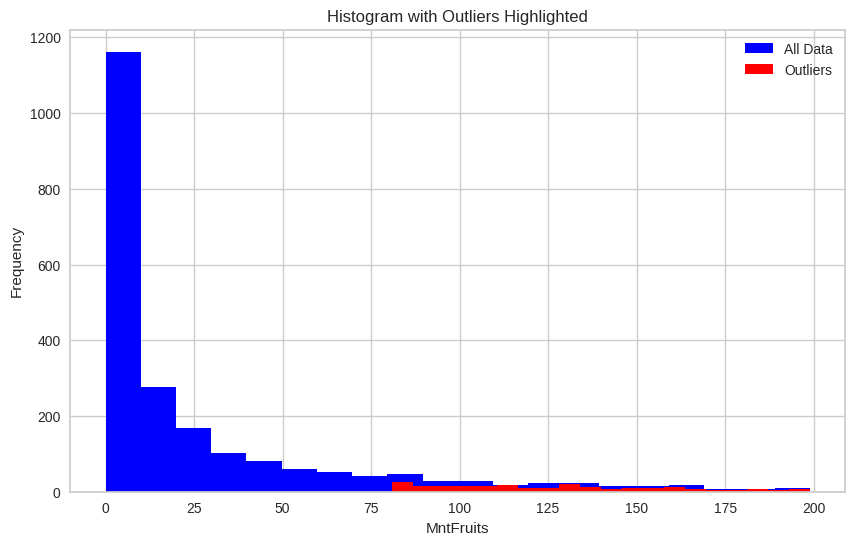

In [ ]:
# Plot a Histogram with the normal data and the outlier data layered on top in red to see if it is a significant amount of data in the outliers
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['MntFruits'], bins=20, color='blue', label='All Data') # Histogram for all data
plt.hist(outliers['MntFruits'], bins=20, color='red', label='Outliers') # Overlay histogram for outliers # Changed this line to index the "MntWines" column of the outliers DataFrame directly
plt.xlabel('MntFruits')
plt.ylabel('Frequency')
plt.title('Histogram with Outliers Highlighted')
plt.legend()
plt.show()

In [ ]:

#Previous code calculated upper_whisker and lower_whisker)

# Identify outliers for the category
outliers = filtered_data[(filtered_data['MntFruits'] > upper_whisker) | (filtered_data['MntFruits'] < lower_whisker)]

# Apply filtering to the FILTERED data copy --- to keep only rows within the acceptable range of category listed
filtered_data = filtered_data[~filtered_data.index.isin(outliers.index)]

from IPython.display import clear_output

# this will clea cell output above this line
clear_output()


print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)


Original data shape: (2240, 27)
Filtered data shape: (1958, 28)


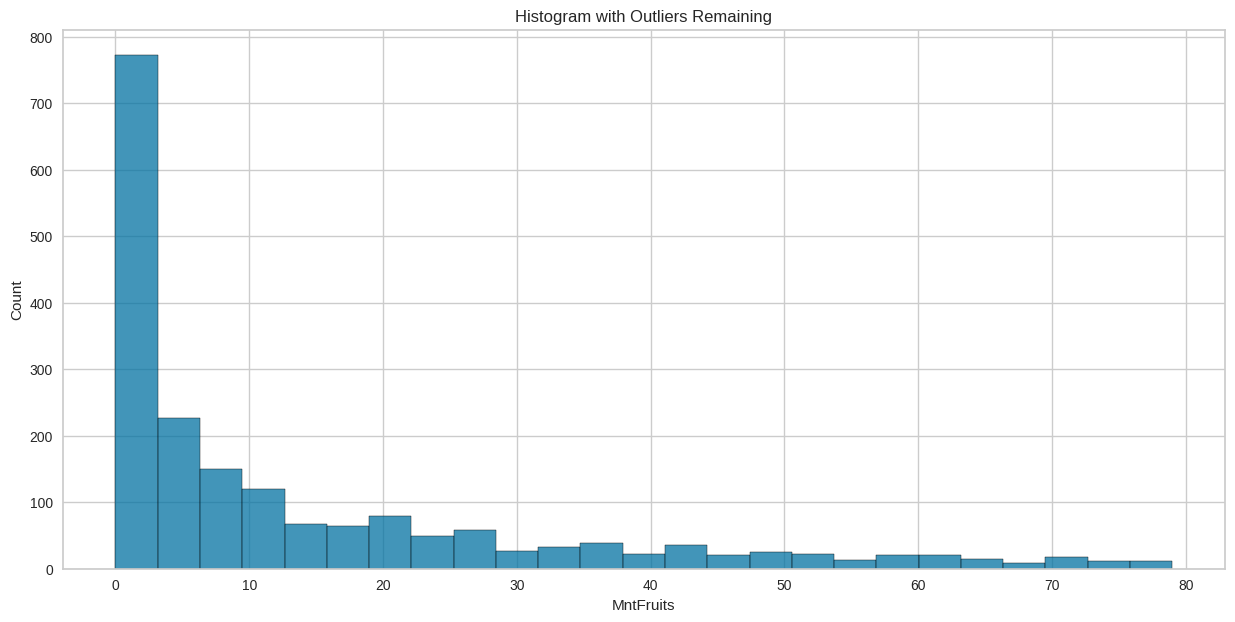

In [ ]:

# Plot new histogram
plt.figure(figsize=(15, 7))
sns.histplot(x='MntFruits', data=filtered_data)
plt.title('Histogram with Outliers Remaining')
plt.show()

MAKE A NEW BOX PLOT

Text(0.5, 1.0, 'Boxplot with Outliers Remaining')

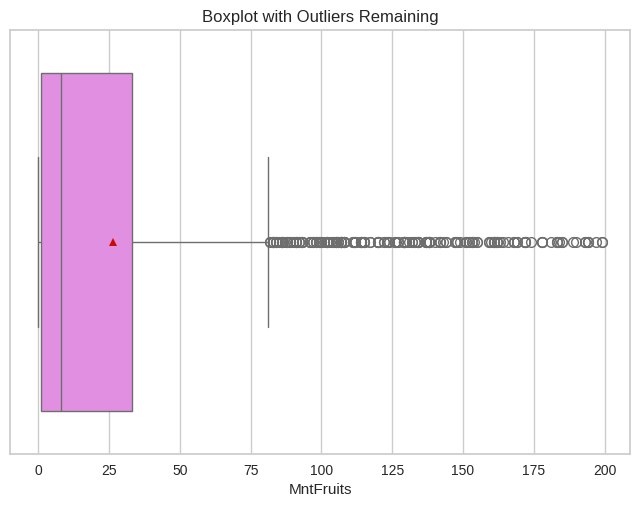

In [26]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='MntFruits', showmeans=True, color="violet")
plt.title('Boxplot with Outliers Remaining')

# **ENDING UNIVARIATE DATA CHECK**

In [ ]:
print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

Original data shape: (2240, 27)
Filtered data shape: (2182, 28)




---
# **NEW CATEGORY SET**


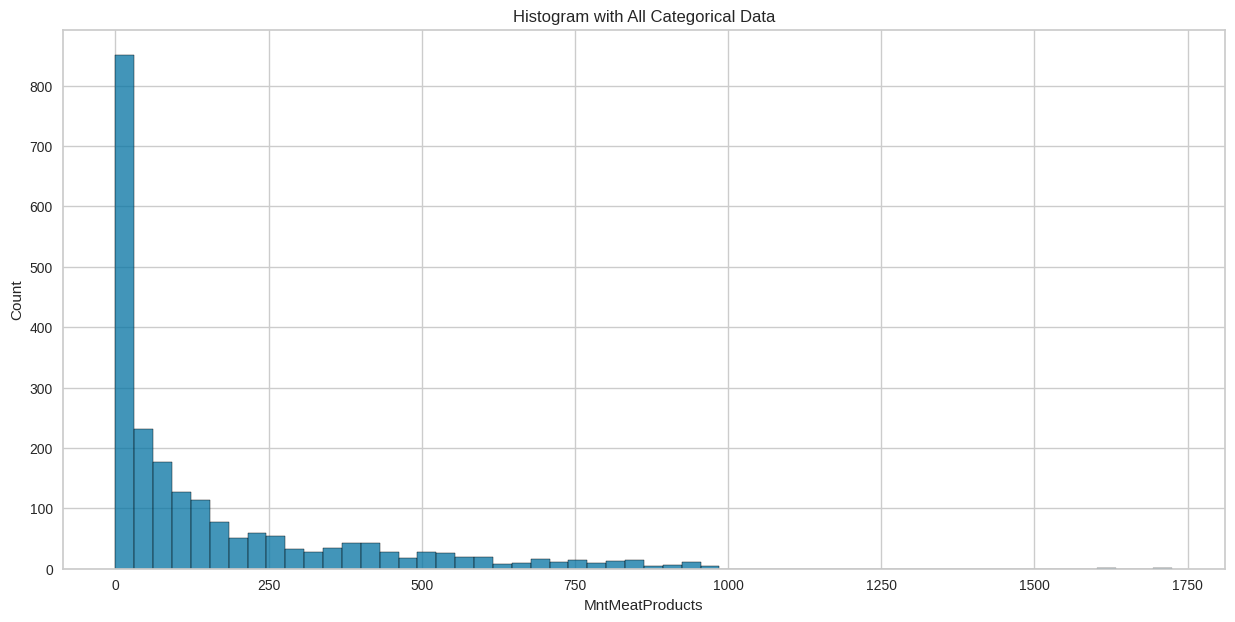

In [ ]:
# Plot the histogram for 'MntMeatProducts'
plt.figure(figsize=(15, 7))
sns.histplot(x='MntMeatProducts', data=filtered_data)
plt.title('Histogram with All Categorical Data')
plt.show()

Text(0.5, 1.0, 'Boxplot with All Categorical Data')

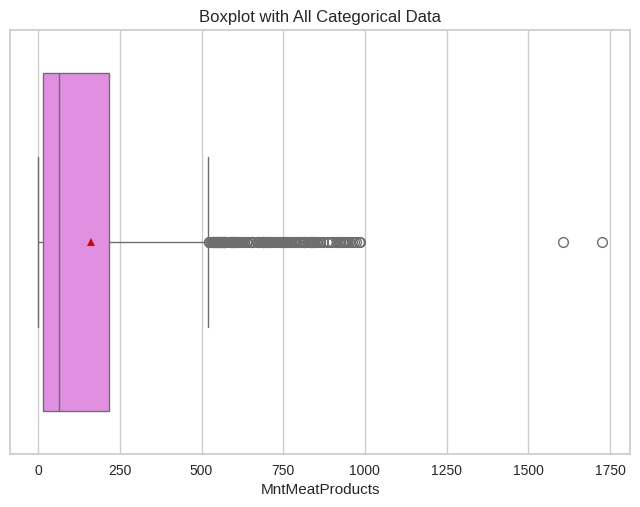

In [ ]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='MntMeatProducts', showmeans=True, color="violet")
plt.title('Boxplot with All Categorical Data')

# **GATHER WHISKER & OUTLIER INFORMATION**

In [ ]:
# Name the column name for this block of code
column_name = 'MntMeatProducts'

# Calculating the upper whisker for the variable
Q1 = filtered_data[column_name].quantile(q=0.25) # Finding the first quartile
Q3 = filtered_data[column_name].quantile(q=0.75) # Finding the third quartile
IQR = Q3 - Q1 # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR) # Calculating the Upper Whisker for the variable
lower_whisker = (Q1 - 1.5 * IQR) # Calculating the lower Whisker for the variable

# Identify outliers - this is creating a boolean mask
outliers = filtered_data[(filtered_data[column_name] > upper_whisker) | (filtered_data[column_name] < lower_whisker)]


# Printing Upper Whisker Limit
print(f"Upper Whisker Limit: {upper_whisker}")


# Check the 99.5% percentile value for the variable
majority_percentile_value = filtered_data[column_name].quantile(q=0.995)
# Print the percentage
print(f"99.5% of observations in '{column_name}' are under: {majority_percentile_value:}")


# Count outliers and total data points
num_outliers = len(outliers)
total_data_points = len(filtered_data)  # Assuming 'data' is your DataFrame
# Print the count of outliers out of the total observation count
print(f"Number of outliers in '{column_name}': {num_outliers} out of {total_data_points}")


# Calculate outlier percentage
outlier_percentage = (num_outliers / total_data_points) * 100
# Print the percentage
print(f"Outlier Percentage in '{column_name}': {outlier_percentage:.2f}%")


# Print outlier values - Changed to use outliers[column_name] to get the values
print(f"Outlier Values in '{column_name}': {outliers[column_name].tolist()}")

Upper Whisker Limit: 520.0
99.5% of observations in 'MntMeatProducts' are under: 936.3799999999992
Number of outliers in 'MntMeatProducts': 191 out of 2182
Outlier Percentage in 'MntMeatProducts': 8.75%
Outlier Values in 'MntMeatProducts': [546, 1725, 801, 536, 780, 550, 538, 925, 779, 568, 690, 812, 951, 590, 921, 756, 537, 813, 553, 554, 540, 740, 757, 768, 565, 573, 561, 570, 562, 832, 785, 818, 815, 549, 786, 591, 792, 537, 974, 594, 670, 925, 761, 940, 530, 797, 635, 592, 572, 732, 713, 653, 711, 838, 559, 597, 706, 617, 742, 689, 898, 522, 546, 706, 597, 747, 804, 774, 929, 845, 569, 838, 685, 873, 674, 523, 890, 704, 606, 790, 925, 651, 640, 545, 733, 961, 568, 534, 678, 555, 548, 842, 843, 711, 818, 864, 750, 731, 604, 547, 915, 549, 689, 801, 913, 946, 672, 611, 687, 842, 622, 790, 717, 537, 528, 573, 984, 694, 595, 672, 553, 573, 601, 553, 717, 687, 706, 724, 827, 560, 701, 915, 639, 573, 625, 649, 832, 575, 599, 536, 768, 850, 835, 936, 935, 853, 558, 751, 693, 534, 629, 981

99.5% of money spent is under 935.84 and my upper whisker is 554.13. Ther is nearly the same amount of money being spent in the outlier group as in the typical grouping. Need to look at this group.

# **MAKE A OVERLAPPING HISTOGRAM TO SEE OUTLIERS**

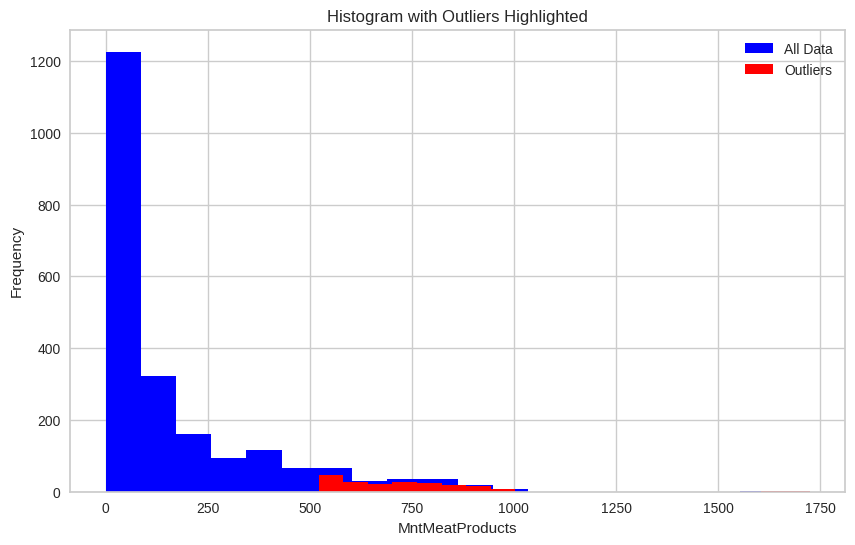

In [ ]:
# Plot a Histogram with the normal data and the outlier data layered on top in red to see if it is a significant amount of data in the outliers
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['MntMeatProducts'], bins=20, color='blue', label='All Data') # Histogram for all data
plt.hist(outliers['MntMeatProducts'], bins=20, color='red', label='Outliers') # Overlay histogram for outliers # Changed this line to index the "MntWines" column of the outliers DataFrame directly
plt.xlabel('MntMeatProducts')
plt.ylabel('Frequency')
plt.title('Histogram with Outliers Highlighted')
plt.legend()
plt.show()

# **ENDING UNIVARIATE DATA CHECK**

In [ ]:
print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

Original data shape: (2240, 27)
Filtered data shape: (2182, 28)




---
# **NEW CATEGORY SET**

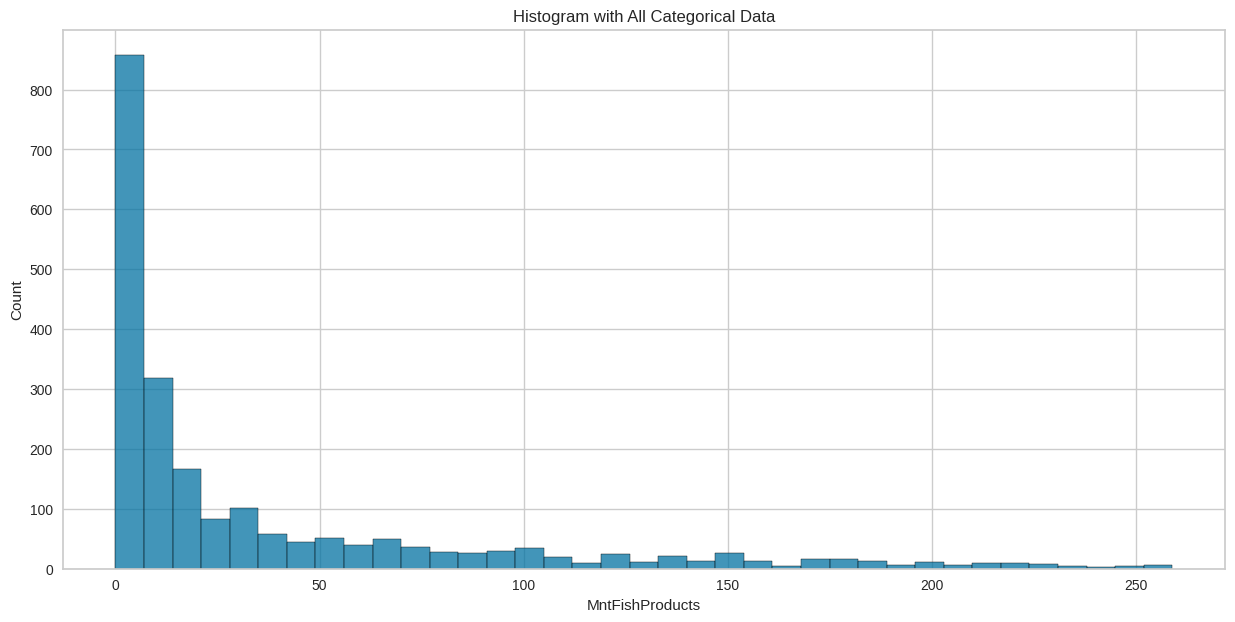

In [ ]:
# Plot the histogram for 'MntFishProduct'
plt.figure(figsize=(15, 7))
sns.histplot(x='MntFishProducts', data=filtered_data)
plt.title('Histogram with All Categorical Data')
plt.show()

Text(0.5, 1.0, 'Boxplot with All Categorical Data')

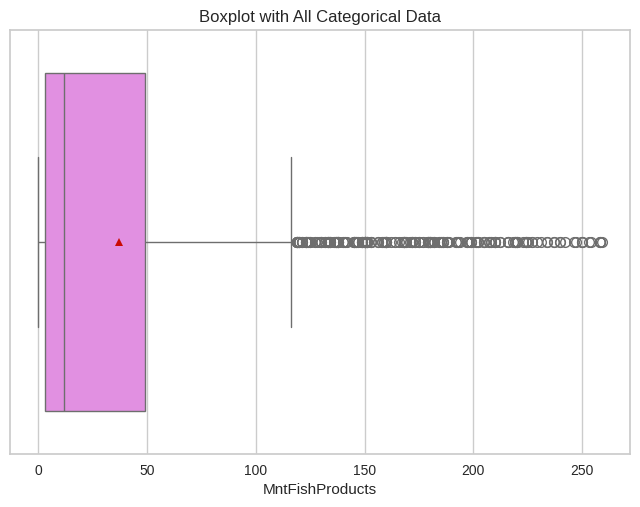

In [ ]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='MntFishProducts', showmeans=True, color="violet")
plt.title('Boxplot with All Categorical Data')

# **GATHER WHISKER & OUTLIER INFORMATION**

In [ ]:
# Name the column name for this block of code
column_name = 'MntFishProducts'

# Calculating the upper whisker for the variable
Q1 = filtered_data[column_name].quantile(q=0.25) # Finding the first quartile
Q3 = filtered_data[column_name].quantile(q=0.75) # Finding the third quartile
IQR = Q3 - Q1 # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR) # Calculating the Upper Whisker for the variable
lower_whisker = (Q1 - 1.5 * IQR) # Calculating the lower Whisker for the variable

# Identify outliers - this is creating a boolean mask
outliers = filtered_data[(filtered_data[column_name] > upper_whisker) | (filtered_data[column_name] < lower_whisker)]


# Printing Upper Whisker Limit
print(f"Upper Whisker Limit: {upper_whisker}")


# Check the 99.5% percentile value for the variable
majority_percentile_value = filtered_data[column_name].quantile(q=0.995)
# Print the percentage
print(f"99.5% of observations in '{column_name}' are under: {majority_percentile_value:}")


# Count outliers and total data points
num_outliers = len(outliers)
total_data_points = len(filtered_data)  # Assuming 'data' is your DataFrame
# Print the count of outliers out of the total observation count
print(f"Number of outliers in '{column_name}': {num_outliers} out of {total_data_points}")


# Calculate outlier percentage
outlier_percentage = (num_outliers / total_data_points) * 100
# Print the percentage
print(f"Outlier Percentage in '{column_name}': {outlier_percentage:.2f}%")


# Print outlier values - Changed to use outliers[column_name] to get the values
print(f"Outlier Values in '{column_name}': {outliers[column_name].tolist()}")

Upper Whisker Limit: 118.0
99.5% of observations in 'MntFishProducts' are under: 242.3799999999992
Number of outliers in 'MntFishProducts': 231 out of 2182
Outlier Percentage in 'MntFishProducts': 10.59%
Outlier Values in 'MntFishProducts': [172, 225, 150, 119, 160, 227, 156, 180, 121, 119, 201, 189, 137, 185, 151, 123, 173, 149, 134, 173, 140, 147, 224, 254, 180, 186, 218, 133, 150, 220, 205, 162, 188, 150, 150, 166, 216, 219, 151, 172, 119, 212, 129, 151, 137, 156, 179, 179, 149, 197, 220, 199, 205, 120, 169, 240, 146, 224, 127, 136, 168, 132, 147, 231, 168, 202, 119, 125, 175, 179, 133, 119, 121, 172, 164, 177, 138, 138, 175, 247, 127, 150, 227, 159, 153, 123, 134, 202, 234, 210, 133, 168, 160, 160, 194, 250, 138, 146, 220, 237, 250, 145, 167, 160, 150, 192, 180, 137, 130, 132, 120, 125, 168, 132, 184, 134, 240, 186, 125, 219, 237, 123, 138, 158, 216, 259, 168, 219, 186, 151, 145, 133, 137, 207, 160, 210, 172, 182, 141, 182, 124, 171, 193, 160, 130, 242, 175, 180, 246, 188, 210, 234

99.5% of amount being spent is under 241.69 and the upper whisker is under 120. Keeping these data points to explore further.

# **MAKE AN OVERLAPPING HISTOGRAM TO SEE OUTLIERS**

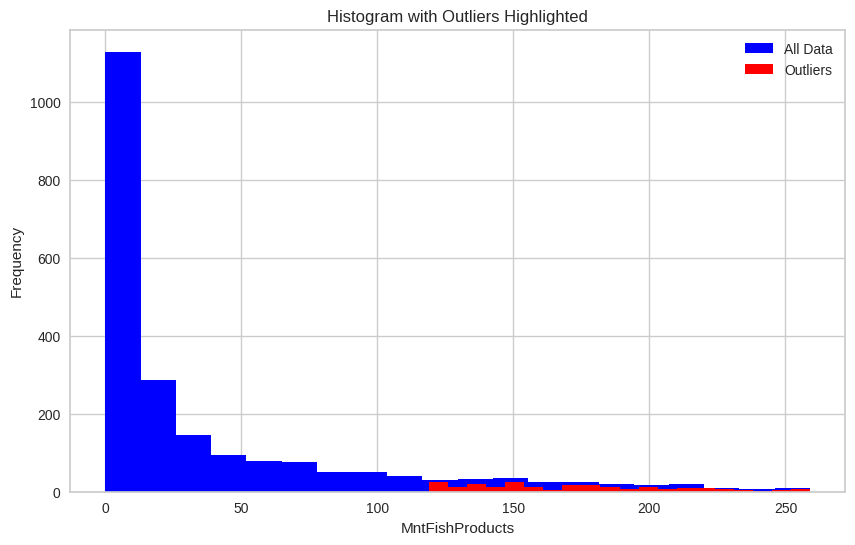

In [ ]:
# Plot a Histogram with the normal data and the outlier data layered on top in red to see if it is a significant amount of data in the outliers
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['MntFishProducts'], bins=20, color='blue', label='All Data') # Histogram for all data
plt.hist(outliers['MntFishProducts'], bins=20, color='red', label='Outliers') # Overlay histogram for outliers # Changed this line to index the "MntWines" column of the outliers DataFrame directly
plt.xlabel('MntFishProducts')
plt.ylabel('Frequency')
plt.title('Histogram with Outliers Highlighted')
plt.legend()
plt.show()

# **ENDING UNIVARIATE DATA CHECK**

In [ ]:
print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

Original data shape: (2240, 27)
Filtered data shape: (2182, 28)




---
# **NEW CATEGORY SET**


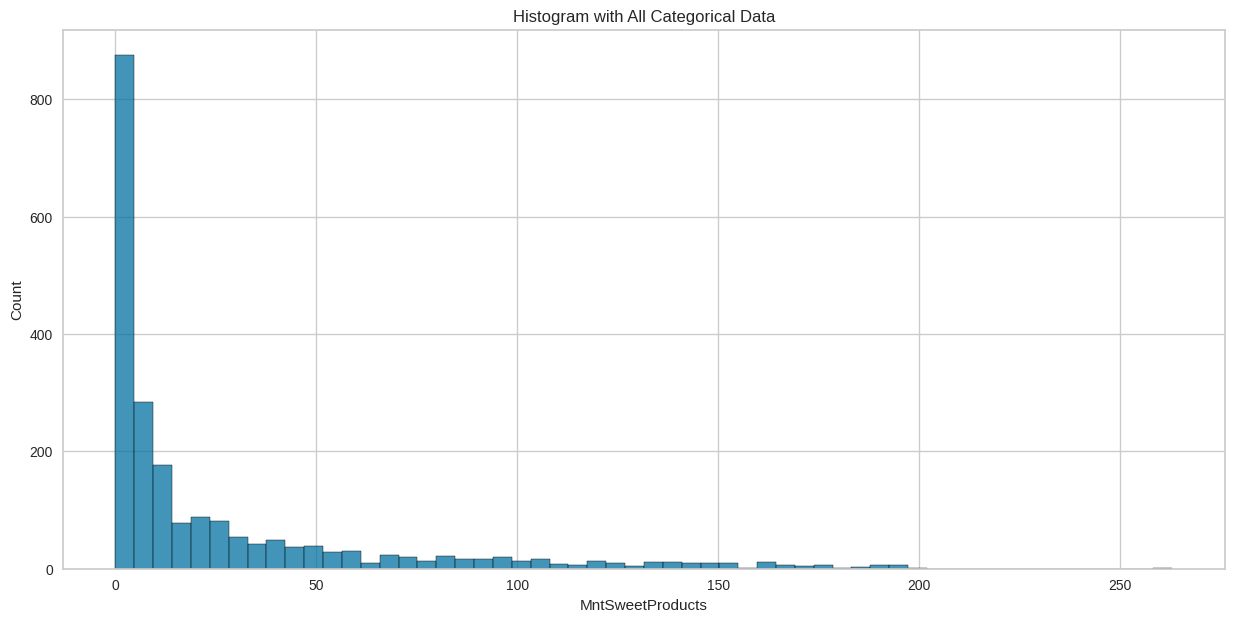

In [ ]:
# Plot the histogram for 'MntSweetProducts'
plt.figure(figsize=(15, 7))
sns.histplot(x='MntSweetProducts', data=filtered_data)
plt.title('Histogram with All Categorical Data')
plt.show()

Text(0.5, 1.0, 'Boxplot with All Categorical Data')

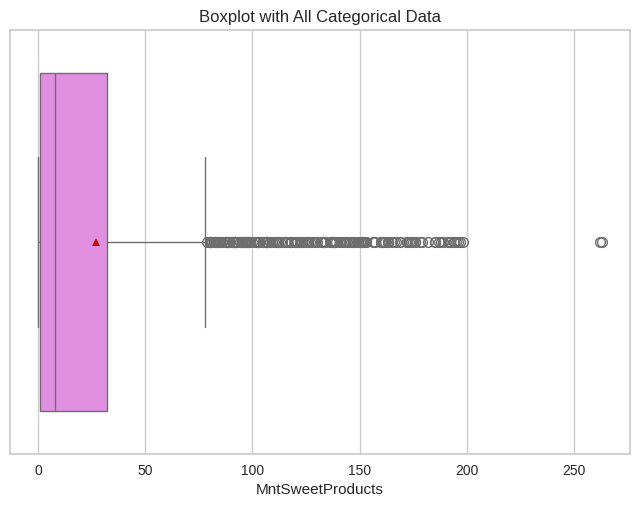

In [ ]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='MntSweetProducts', showmeans=True, color="violet")
plt.title('Boxplot with All Categorical Data')

# **GATHER WHISKER & OUTLIER INFORMATION**

In [ ]:
# Name the column name for this block of code
column_name = 'MntSweetProducts'

# Calculating the upper whisker for the variable
Q1 = filtered_data[column_name].quantile(q=0.25) # Finding the first quartile
Q3 = filtered_data[column_name].quantile(q=0.75) # Finding the third quartile
IQR = Q3 - Q1 # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR) # Calculating the Upper Whisker for the variable
lower_whisker = (Q1 - 1.5 * IQR) # Calculating the lower Whisker for the variable

# Identify outliers - this is creating a boolean mask
outliers = filtered_data[(filtered_data[column_name] > upper_whisker) | (filtered_data[column_name] < lower_whisker)]


# Printing Upper Whisker Limit
print(f"Upper Whisker Limit: {upper_whisker}")


# Check the 99.5% percentile value for the variable
majority_percentile_value = filtered_data[column_name].quantile(q=0.995)
# Print the percentage
print(f"99.5% of observations in '{column_name}' are under: {majority_percentile_value:}")


# Count outliers and total data points
num_outliers = len(outliers)
total_data_points = len(filtered_data)  # Assuming 'data' is your DataFrame
# Print the count of outliers out of the total observation count
print(f"Number of outliers in '{column_name}': {num_outliers} out of {total_data_points}")


# Calculate outlier percentage
outlier_percentage = (num_outliers / total_data_points) * 100
# Print the percentage
print(f"Outlier Percentage in '{column_name}': {outlier_percentage:.2f}%")


# Print outlier values - Changed to use outliers[column_name] to get the values
print(f"Outlier Values in '{column_name}': {outliers[column_name].tolist()}")

Upper Whisker Limit: 78.5
99.5% of observations in 'MntSweetProducts' are under: 192.0
Number of outliers in 'MntSweetProducts': 252 out of 2182
Outlier Percentage in 'MntSweetProducts': 11.55%
Outlier Values in 'MntSweetProducts': [88, 112, 263, 178, 167, 120, 120, 122, 82, 105, 133, 132, 98, 82, 103, 89, 91, 89, 113, 173, 87, 176, 102, 87, 138, 163, 124, 172, 84, 149, 92, 130, 114, 141, 147, 97, 118, 153, 189, 107, 128, 163, 133, 134, 91, 150, 137, 91, 103, 172, 95, 156, 194, 96, 191, 84, 192, 129, 108, 107, 123, 185, 134, 121, 163, 127, 125, 121, 198, 115, 80, 82, 98, 106, 101, 110, 134, 102, 83, 107, 160, 138, 122, 166, 136, 106, 98, 80, 116, 133, 120, 182, 91, 148, 161, 161, 157, 153, 123, 133, 143, 102, 92, 169, 103, 149, 91, 86, 146, 123, 137, 92, 87, 152, 112, 115, 133, 152, 138, 92, 83, 95, 161, 93, 160, 115, 112, 137, 172, 151, 99, 144, 151, 122, 147, 115, 195, 91, 189, 161, 98, 175, 145, 162, 105, 96, 187, 126, 97, 108, 143, 80, 147, 105, 160, 194, 85, 98, 89, 109, 151, 152,

99.5% of amount spent is under 191.84 and the upper whisker is at 83.5. Keeping data to explore outliers.

# **MAKE AN OVERLAPPING HISTOGRAM TO SEE OUTLIERS**

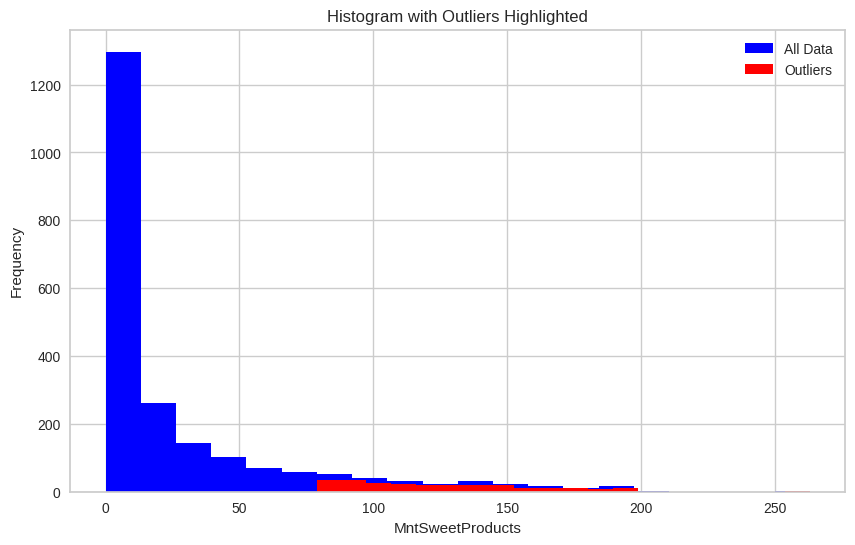

In [ ]:
# Plot a Histogram with the normal data and the outlier data layered on top in red to see if it is a significant amount of data in the outliers
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['MntSweetProducts'], bins=20, color='blue', label='All Data') # Histogram for all data
plt.hist(outliers['MntSweetProducts'], bins=20, color='red', label='Outliers') # Overlay histogram for outliers # Changed this line to index the "MntWines" column of the outliers DataFrame directly
plt.xlabel('MntSweetProducts')
plt.ylabel('Frequency')
plt.title('Histogram with Outliers Highlighted')
plt.legend()
plt.show()

# **ENDING UNIVARIATE DATA CHECK**

In [ ]:
print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

Original data shape: (2240, 27)
Filtered data shape: (2182, 28)




---
# **NEW CATEGORY SET**


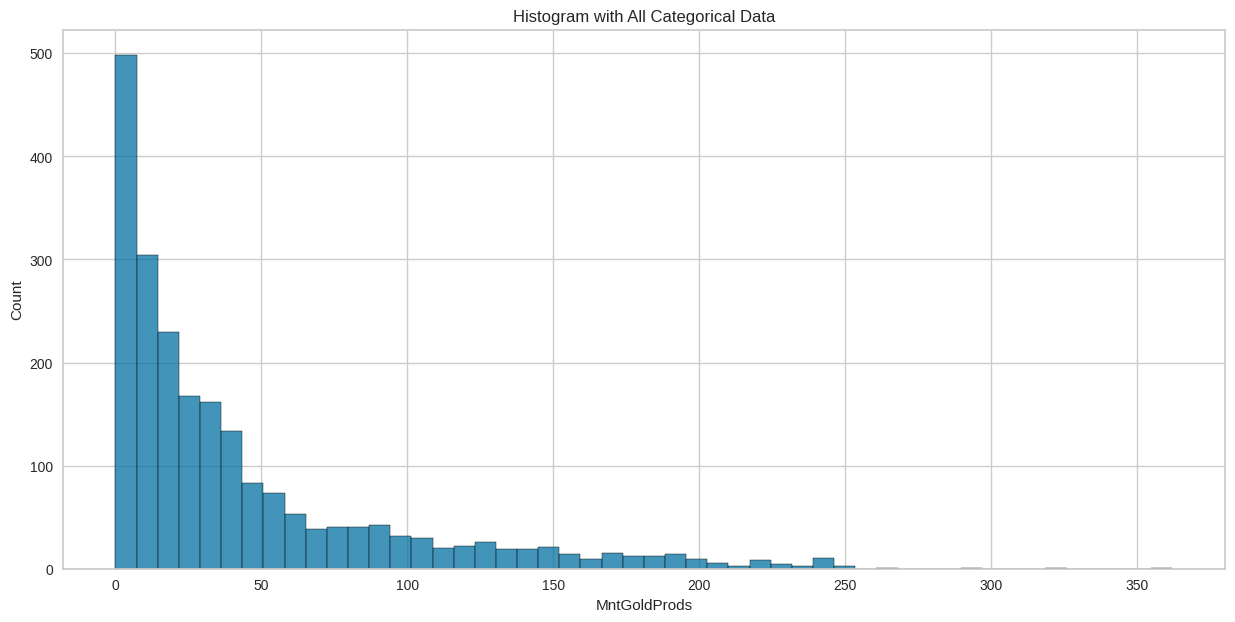

In [ ]:
# Plot the histogram for 'MntGoldProds'
plt.figure(figsize=(15, 7))
sns.histplot(x='MntGoldProds', data=filtered_data)
plt.title('Histogram with All Categorical Data')
plt.show()


Text(0.5, 1.0, 'Boxplot with All Categorical Data')

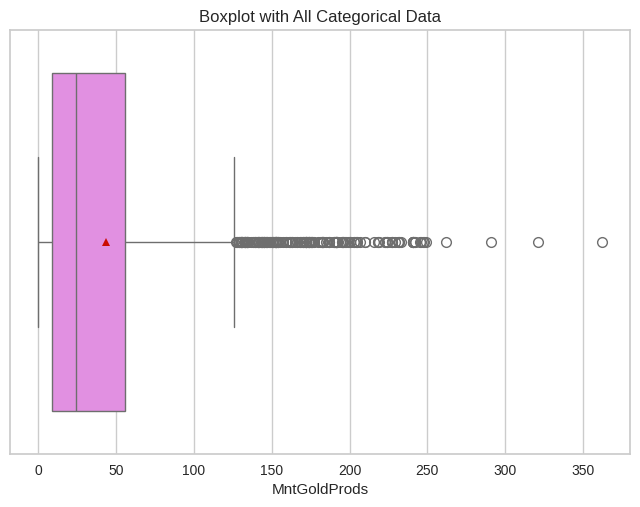

In [ ]:
# Plot the boxplot
sns.boxplot(data=filtered_data, x='MntGoldProds', showmeans=True, color="violet")
plt.title('Boxplot with All Categorical Data')

# **GATHER WHISKER & OUTLIER INFORMATION**

In [ ]:
# Name the column name for this block of code
column_name = 'MntGoldProds'

# Calculating the upper whisker for the variable
Q1 = filtered_data[column_name].quantile(q=0.25) # Finding the first quartile
Q3 = filtered_data[column_name].quantile(q=0.75) # Finding the third quartile
IQR = Q3 - Q1 # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR) # Calculating the Upper Whisker for the variable
lower_whisker = (Q1 - 1.5 * IQR) # Calculating the lower Whisker for the variable

# Identify outliers - this is creating a boolean mask
outliers = filtered_data[(filtered_data[column_name] > upper_whisker) | (filtered_data[column_name] < lower_whisker)]


# Printing Upper Whisker Limit
print(f"Upper Whisker Limit: {upper_whisker}")


# Check the 99.5% percentile value for the variable
majority_percentile_value = filtered_data[column_name].quantile(q=0.995)
# Print the percentage
print(f"99.5% of observations in '{column_name}' are under: {majority_percentile_value:}")


# Count outliers and total data points
num_outliers = len(outliers)
total_data_points = len(filtered_data)  # Assuming 'data' is your DataFrame
# Print the count of outliers out of the total observation count
print(f"Number of outliers in '{column_name}': {num_outliers} out of {total_data_points}")


# Calculate outlier percentage
outlier_percentage = (num_outliers / total_data_points) * 100
# Print the percentage
print(f"Outlier Percentage in '{column_name}': {outlier_percentage:.2f}%")


# Print outlier values - Changed to use outliers[column_name] to get the values
print(f"Outlier Values in '{column_name}': {outliers[column_name].tolist()}")

Upper Whisker Limit: 126.5
99.5% of observations in 'MntGoldProds' are under: 241.0949999999998
Number of outliers in 'MntGoldProds': 197 out of 2182
Outlier Percentage in 'MntGoldProds': 9.03%
Outlier Values in 'MntGoldProds': [176, 362, 174, 241, 190, 169, 145, 223, 168, 172, 216, 130, 223, 141, 172, 192, 182, 181, 152, 172, 148, 241, 146, 162, 131, 182, 135, 203, 139, 224, 173, 218, 142, 233, 157, 159, 172, 191, 241, 134, 130, 153, 175, 224, 165, 190, 163, 159, 144, 207, 146, 151, 141, 154, 242, 191, 147, 174, 155, 249, 151, 183, 170, 191, 151, 152, 227, 205, 134, 198, 139, 177, 133, 145, 141, 187, 171, 130, 205, 170, 142, 129, 175, 242, 135, 241, 174, 182, 166, 227, 144, 172, 133, 139, 131, 195, 231, 182, 191, 145, 218, 200, 187, 200, 147, 190, 133, 142, 153, 134, 131, 154, 192, 132, 210, 241, 144, 210, 172, 154, 138, 134, 176, 262, 168, 140, 131, 246, 138, 130, 196, 191, 144, 153, 170, 197, 196, 200, 133, 199, 127, 134, 161, 180, 187, 195, 191, 141, 149, 128, 183, 291, 150, 153, 1

99.5% of money being spent is under 241.00 and the upper whisker is at 127.13. Keeping this data to explore.

# **MAKE AN OVERLAPPING HISTOGRAM TO SEE OUTLIERS**

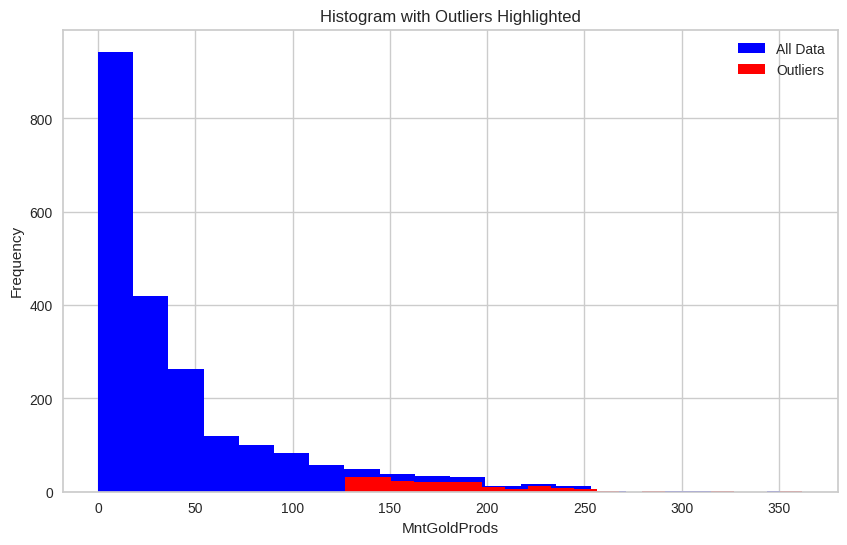

In [ ]:
# Plot a Histogram with the normal data and the outlier data layered on top in red to see if it is a significant amount of data in the outliers
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['MntGoldProds'], bins=20, color='blue', label='All Data') # Histogram for all data
plt.hist(outliers['MntGoldProds'], bins=20, color='red', label='Outliers') # Overlay histogram for outliers # Changed this line to index the "MntWines" column of the outliers DataFrame directly
plt.xlabel('MntGoldProds')
plt.ylabel('Frequency')
plt.title('Histogram with Outliers Highlighted')
plt.legend()
plt.show()

# **ENDING UNIVARIATE DATA CHECK**

In [ ]:
print("Original data shape:", original_data.shape)
print("Filtered data shape:", filtered_data.shape)

Original data shape: (2240, 27)
Filtered data shape: (2182, 28)





---


---

# **SEPERATING THE OUTLIERS FROM THEIR ORIGINAL COLUMNS**

In [ ]:

# Create a copy to avoid modifying the original
filtered_data_copy = filtered_data.copy()

# identify columns to check for outliers
columns_to_check = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# create outlier_lists:
outlier_lists = {}
for column_name in columns_to_check:
    # identify outliers = same def in each code block above + adding to list at end
    outliers = filtered_data[(filtered_data[column_name] > upper_whisker) | (filtered_data[column_name] < lower_whisker)][column_name].tolist()
    outlier_lists[column_name] = outliers  # Store outlier values in the dictionary


# Now, outlier_lists contains outlier values for each category in columns_to_check


def separate_outliers_by_category(filtered_data, columns_to_check, outlier_lists):
    """
    seperates outliers from non-outliers based on pre-calculated outlier lists.

    Args:
        filtered_data (pd.DataFrame): The input DataFrame.
        columns_to_check (list): A list of column names to check for outliers.
        outlier_lists (dict): A dictionary where keys are column names and values are lists of outlier values.

     Returns:
        tuple: Two DataFrames: data_no_outliers (non-outliers) and data_only_outliers (outliers).
    """


    # Initialize masks for outliers and non-outliers
    all_outliers_mask = pd.Series(False, index=filtered_data_copy.index)

    # Iterate through columns and update the outlier mask
    for column in columns_to_check:
        outlier_mask = filtered_data_copy[column].isin(outlier_lists[column])
        all_outliers_mask = all_outliers_mask | outlier_mask

    # Separate outliers and non-outliers using the mask
    data_only_outliers = filtered_data_copy[all_outliers_mask]
    data_no_outliers = filtered_data_copy[~all_outliers_mask]


    # Reset index for both DataFrames
    data_only_outliers.reset_index(drop=True, inplace=True)
    data_no_outliers.reset_index(drop=True, inplace=True)

    return data_no_outliers, data_only_outliers


data_no_outliers, data_only_outliers = separate_outliers_by_category(filtered_data, columns_to_check, outlier_lists)

# Access the separated DataFrames:
# data_no_outliers: Contains the data without outliers.
# data_only_outliers: Contains only the outlier data.


print("Original data shape:", original_data.shape)
print("Filtered data shape - has outliers:", filtered_data.shape)
print("No outlier data shape:", data_no_outliers.shape)
print("Outlier only data shape:", data_only_outliers.shape)


Original data shape: (2240, 27)
Filtered data shape - has outliers: (2182, 28)
No outlier data shape: (1336, 28)
Outlier only data shape: (846, 28)


OBSERVE:
THE TOTAL OF THE 2 NEW DATA SETS = 2182
THE 28 COLUMNS REMAINED



---


# **CHECK THE 2 NEW DATASETS**

In [ ]:

# filtered data - without the outliers
print("No outlier data shape:", data_no_outliers.shape)
# outlier only data
print("Outlier only data shape:", data_only_outliers.shape)

def get_info_table(df):
    """
    Extracts #, column, count, non-null, and dtype from df.info()
    and returns it as an HTML table string.
    """
    info_buffer = io.StringIO()
    df.info(buf=info_buffer)  # Get full info output
    info_lines = info_buffer.getvalue().split('\n')

    # Extract relevant lines (data rows) and column headers
    data_rows = [line.strip().split() for line in info_lines[3:-2]]  # Skip header and footer
    header_row = ["#", "Column", "Count", "Non-Null", "Dtype"]

    # Create HTML table string
    html_table = "<table><thead><tr>"
    for header in header_row:
        html_table += f"<th>{header}</th>"
    html_table += "</tr></thead><tbody>"
    for row in data_rows:
        html_table += "<tr>"
        for cell in row:
            html_table += f"<td>{cell}</td>"
        html_table += "</tr>"
    html_table += "</tbody></table>"
    return html_table

# Get HTML tables for both DataFrames
original_info_table = get_info_table(data_no_outliers)
filtered_info_table = get_info_table(data_only_outliers)

# Display side-by-side with a line in between using HTML and CSS
display_html(f"<div style='display: flex;'><div style='flex: 1; border-right: 1px solid black;'>{original_info_table}</div><div style='flex: 1;'>{filtered_info_table}</div></div>", raw=True)

No outlier data shape: (1336, 28)
Outlier only data shape: (846, 28)


# Column Count Non-Null Dtype # Column Non-Null Count Dtype --- ------ -------------- ----- 0 ID 1336 non-null int64 1 Year_Birth 1336 non-null int64 2 Education 1336 non-null object 3 Marital_Status 1336 non-null object 4 Income 1321 non-null float64 5 Kidhome 1336 non-null int64 6 Teenhome 1336 non-null int64 7 Dt_Customer 1336 non-null datetime64[ns] 8 Recency 1336 non-null int64 9 MntWines 1336 non-null int64 10 MntFruits 1336 non-null int64 11 MntMeatProducts 1336 non-null int64 12 MntFishProducts 1336 non-null int64 13 MntSweetProducts 1336 non-null int64 14 MntGoldProds 1336 non-null int64 15 NumDealsPurchases 1336 non-null int64 16 NumWebPurchases 1336 non-null int64 17 NumCatalogPurchases 1336 non-null int64 18 NumStorePurchases 1336 non-null int64 19 NumWebVisitsMonth 1336 non-null int64 20 AcceptedCmp3 1336 non-null int64 21 AcceptedCmp4 1336 non-null int64 22 AcceptedCmp5 1336 non-null int64 23 AcceptedCmp1 1336 non-null int64 24 AcceptedCmp2 1336 non-null int64 25 Complain 1336 non-null int64 26 Response 1336 non-null int64 27 quarter 1336 non-null int32 dtypes: datetime64[ns](1), float64(1), int32(1), int64(23), object(2) # Column Count Non-Null Dtype # Column Non-Null Count Dtype --- ------ -------------- ----- 0 ID 846 non-null int64 1 Year_Birth 846 non-null int64 2 Education 846 non-null object 3 Marital_Status 846 non-null object 4 Income 837 non-null float64 5 Kidhome 846 non-null int64 6 Teenhome 846 non-null int64 7 Dt_Customer 846 non-null datetime64[ns] 8 Recency 846 non-null int64 9 MntWines 846 non-null int64 10 MntFruits 846 non-null int64 11 MntMeatProducts 846 non-null int64 12 MntFishProducts 846 non-null int64 13 MntSweetProducts 846 non-null int64 14 MntGoldProds 846 non-null int64 15 NumDealsPurchases 846 non-null int64 16 NumWebPurchases 846 non-null int64 17 NumCatalogPurchases 846 non-null int64 18 NumStorePurchases 846 non-null int64 19 NumWebVisitsMonth 846 non-null int64 20 AcceptedCmp3 846 non-null int64 21 AcceptedCmp4 846 non-null int64 22 AcceptedCmp5 846 non-null int64 23 AcceptedCmp1 846 non-null int64 24 AcceptedCmp2 846 non-null int64 25 Complain 846 non-null int64 26 Response 846 non-null int64 27 quarter 846 non-null int32 dtypes: datetime64[ns](1), float64(1), int32(1), int64(23), object(2)

## **2. Univariate analysis - Categorical Data**

Write a function that will help create bar plots to indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [ ]:
# This sets up the bar plots structure as a whole. Each set of plots are run in a code block.

def perc_on_bar(data_only_outliers, z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    # Length of the column
    total = len(data_only_outliers[z])
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=data_only_outliers[z],color='#f6bba5',order = data_only_outliers[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2                         # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot

        ax.annotate(percentage, (x, y), size = 12)                # Annotate the percentage

    plt.title('Bar Plot with Only Outliers')                        # Places the title at the top
    plt.show()                                                    # Show the plot

#### Plot barplot for the variable Marital_Status.

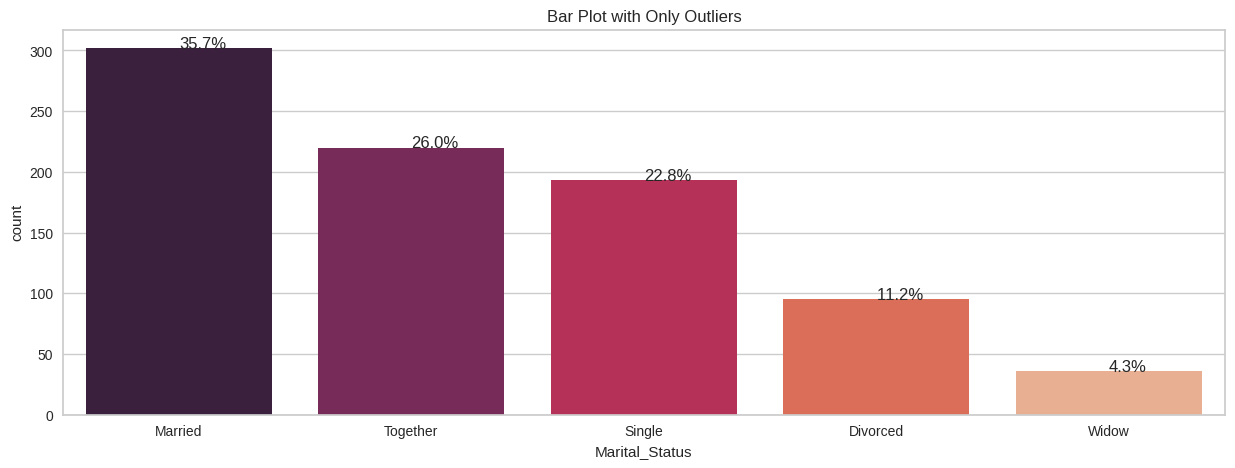

In [ ]:
# Bar plot for 'Marital_Status'
perc_on_bar(data_only_outliers, 'Marital_Status')

#### **Note:** Explore for other categorical variables like Education, Kidhome, Teenhome, Complain.

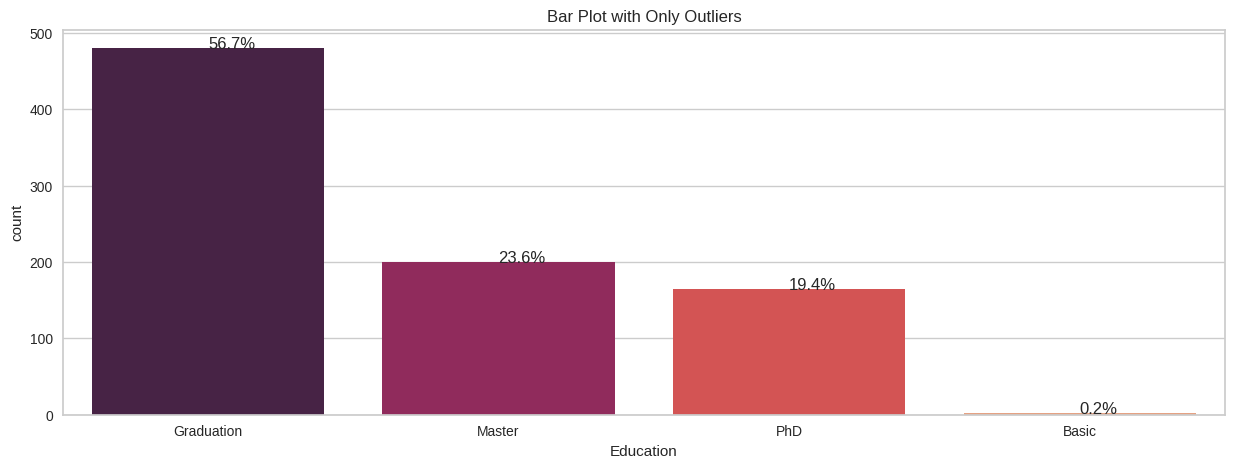

In [ ]:
# Bar plot for 'Education'
perc_on_bar(data_only_outliers, 'Education')

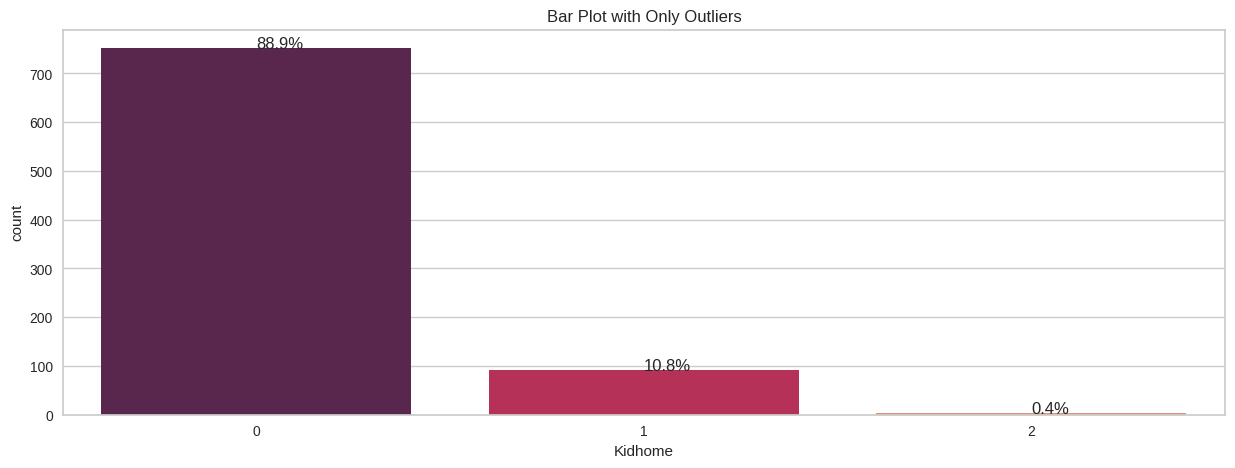

In [ ]:
 # Bar plot for 'Kidhome'
perc_on_bar(data_only_outliers, 'Kidhome')


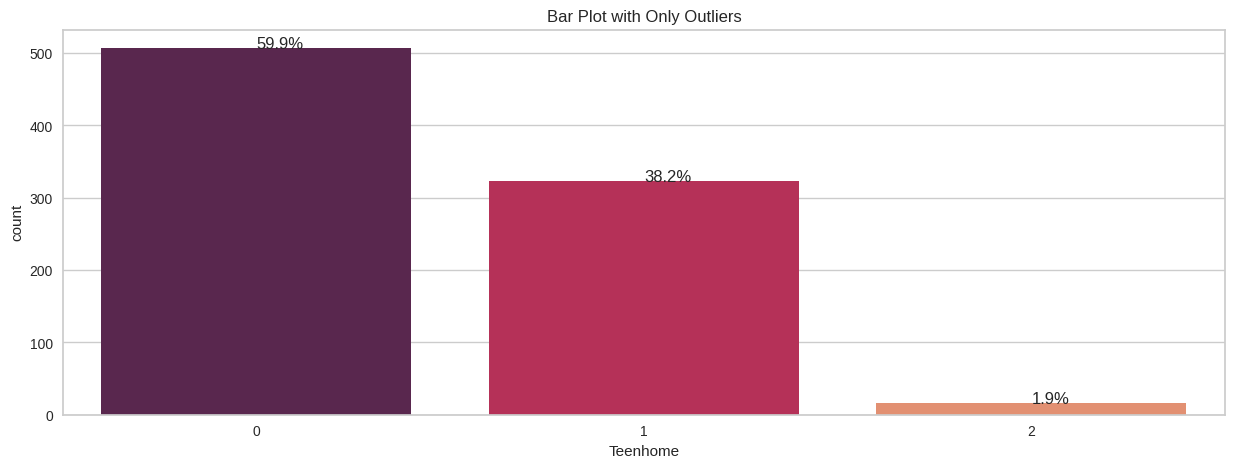

In [ ]:
 # Bar plot for 'Teenhome'
perc_on_bar(data_only_outliers, 'Teenhome')

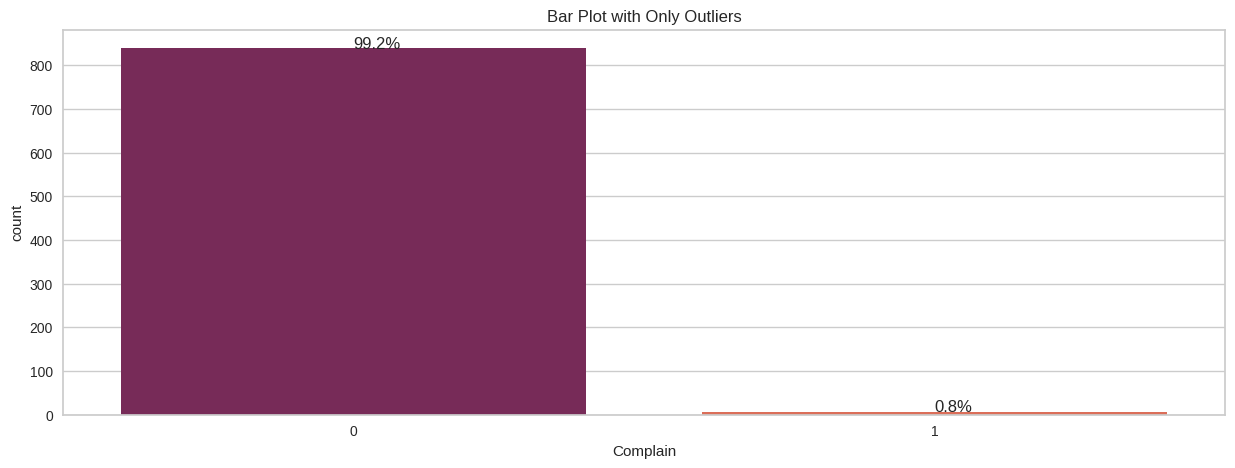

In [ ]:
 # Bar plot for 'Complain'
perc_on_bar(data_only_outliers, 'Complain')

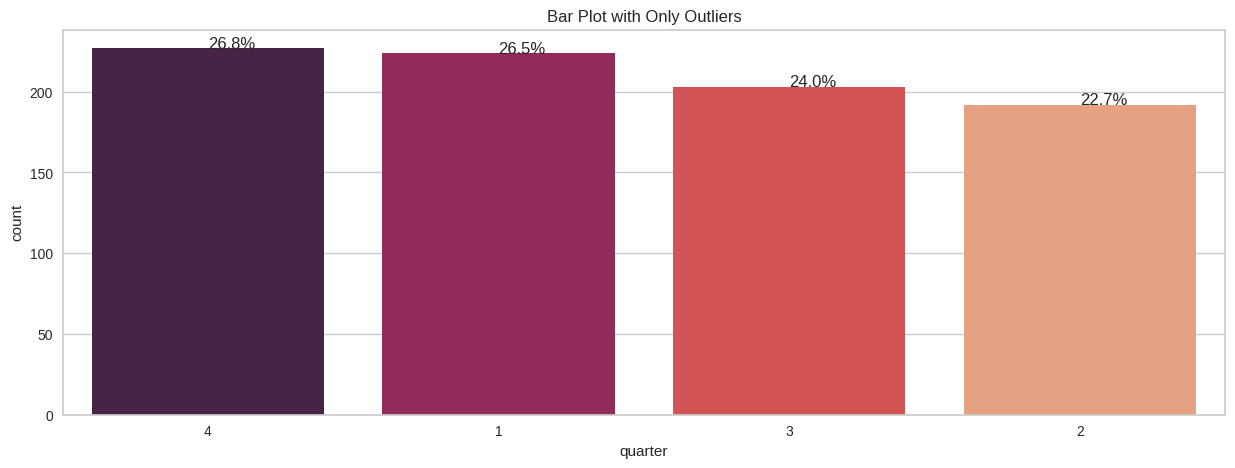

In [ ]:
 # Bar plot for 'Dt_Customer by quarter'
# Assuming 'unique_dates_by_quarter' is a Series with 'quarter' as the relevant column:
perc_on_bar(data_only_outliers, 'quarter')

## **Bivariate Analysis**

Have analyzed individual categorical and numerical variables.

Now, check relationship of variables to one other.

### **Correlation Heat map**
To show a correlation matrix between features.

<Figure size 800x550 with 0 Axes>

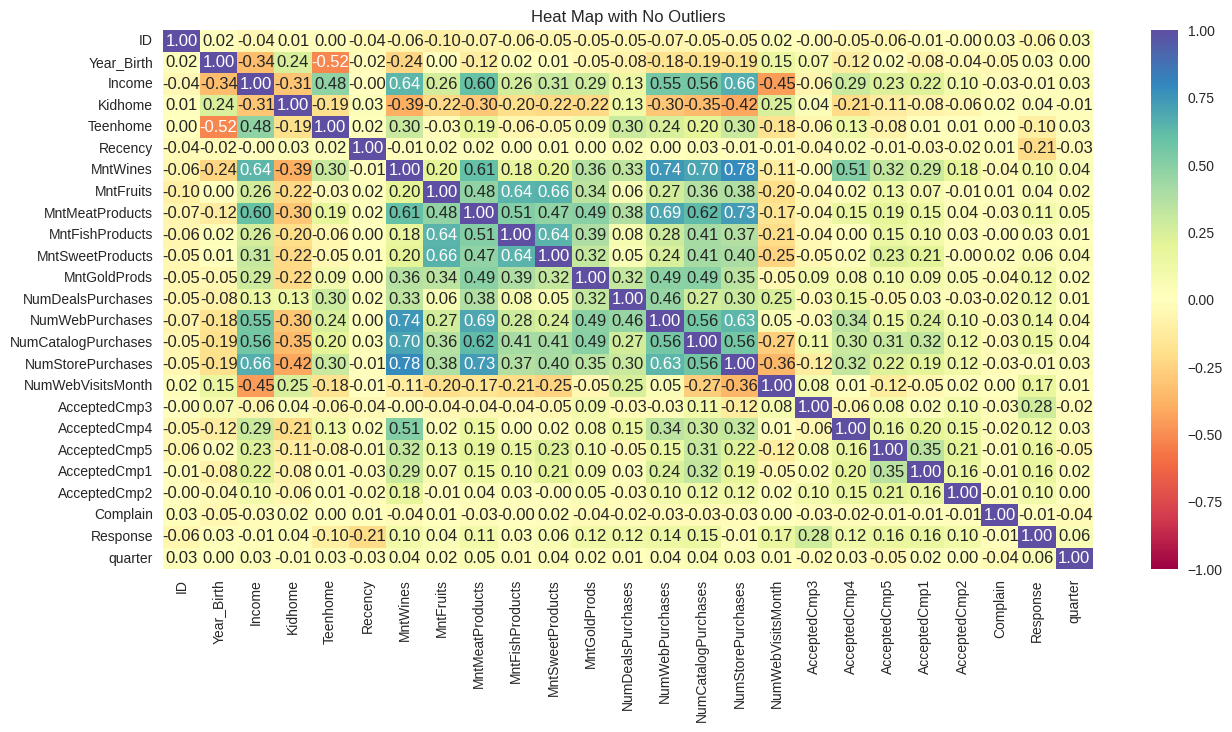

In [ ]:
# CONVERTED OBJECT CATEGORY USING ONE HOT ENCODING

plt.clf() # Clear the current figure

# Assuming 'data_no_outliers' is your DataFrame

# Perform One-Hot Encoding on the 'Education' column
education_encoded = pd.get_dummies(data_no_outliers['Education'], prefix='Education')

# Concatenate the encoded columns with the original DataFrame
data_encoded = pd.concat([data_no_outliers, education_encoded], axis=1)

# Drop the original 'Education' column
data_encoded = data_encoded.drop('Education', axis=1)

# Select only numerical features for the heatmap
numeric_data = data_encoded.select_dtypes(include=['number'])

plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot using numeric data only

plt.title('Heat Map with No Outliers')
plt.show()

#### **Observations and Insights:**

**The above correlation heatmap only shows the relationship between numerical variables. Let's check the relationship of numerical variables with categorical variables.**

### **Education Vs Income**

Axes(0.125,0.11;0.775x0.77)


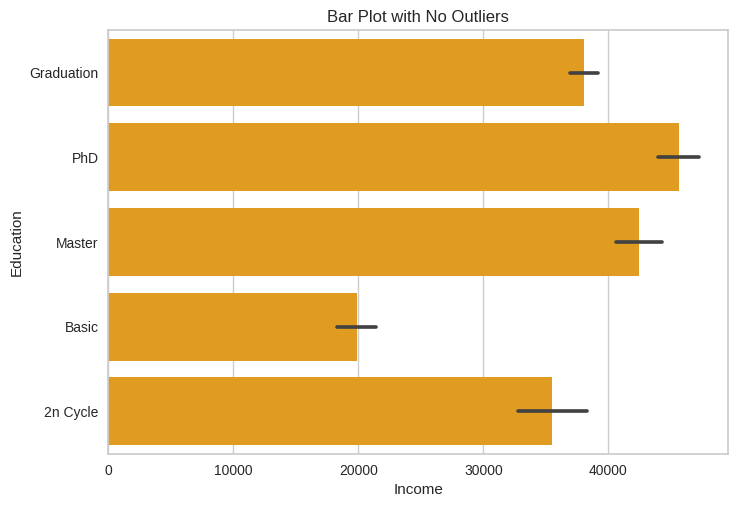

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Bar Plot with No Outliers')
# Assuming 'Income' and 'Education' are column names in 'data_no_outliers' DataFrame
print(sns.barplot(x='Income', y='Education', data=data_no_outliers, color='#FFA500'))



### **Marital Status Vs Income**

Axes(0.125,0.11;0.775x0.77)


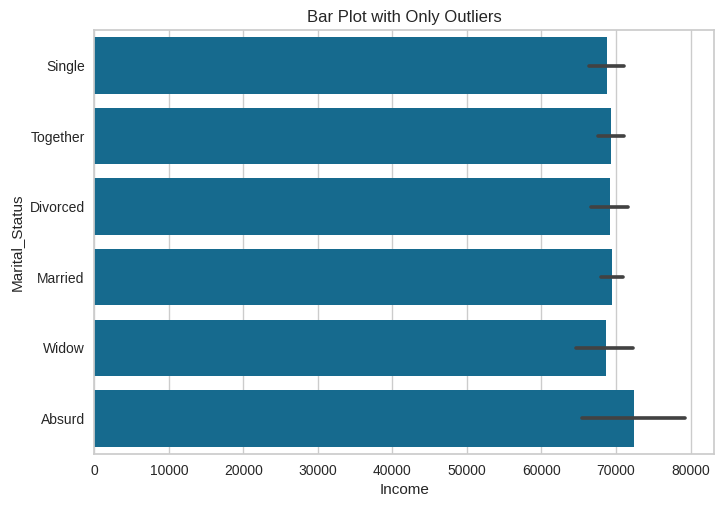

In [ ]:
# Plot the bar plot for Marital_Status and Income
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Bar Plot with Only Outliers')
# Assuming 'Income' and 'Education' are column names in 'data_no_outliers' DataFrame
print(sns.barplot(x='Income', y='Marital_Status', data=data_only_outliers))





### **Kidhome Vs Income**

Axes(0.125,0.11;0.775x0.77)


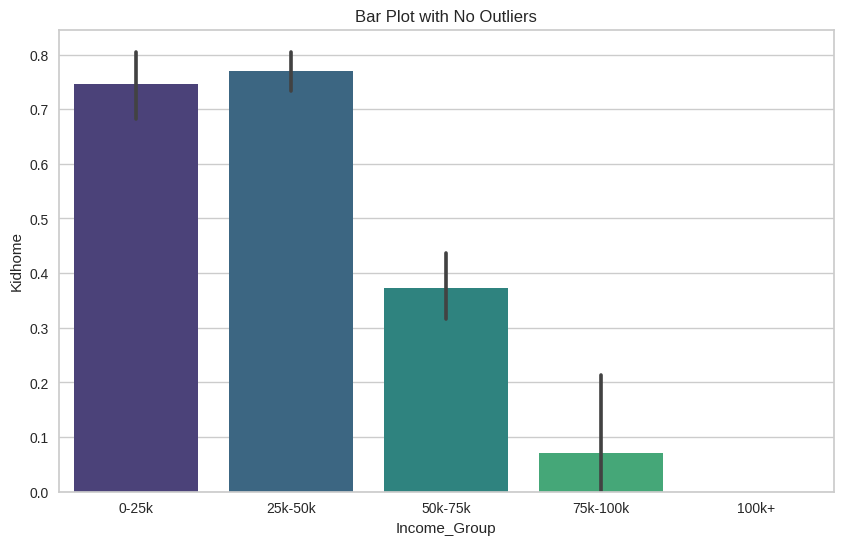

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define income groups and labels:
income_bins = [0, 25000, 50000, 75000, 100000, float('inf')]  # Define your desired income ranges
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k+']  # Labels for each group

# 2. Create a new column with income groups:
data_no_outliers['Income_Group'] = pd.cut(data_no_outliers['Income'], bins=income_bins, labels=income_labels)


# 3. Plot the bar plot using the new income groups:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.title('Bar Plot with No Outliers')
print(sns.barplot(x='Income_Group', y='Kidhome', data=data_no_outliers, palette="viridis"))









### **Marital_Status Vs Kidhome**

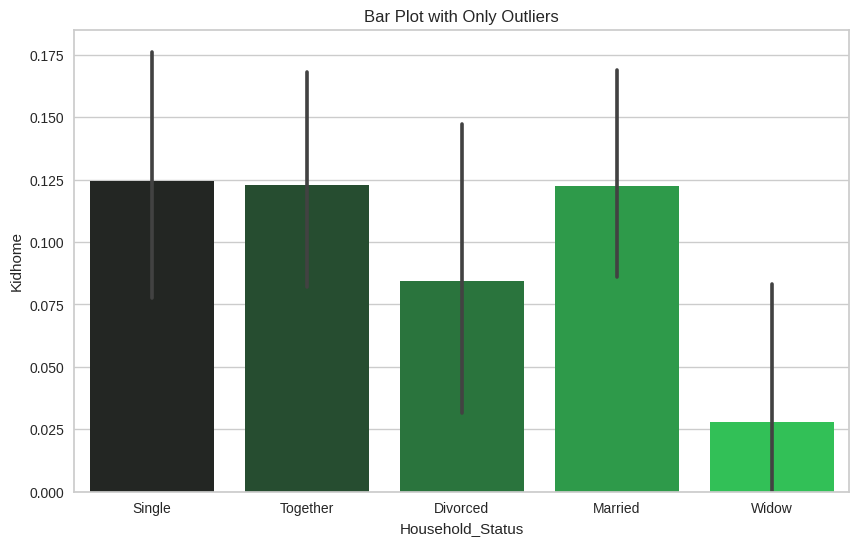

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace "single", "divorced," and "widow" with "1 person household":
data_only_outliers['Household_Status'] = data_only_outliers['Marital_Status'].replace(['single', 'divorced', 'widow'], '1 person household')

# Replace "married" and "together" with "2 person household":
data_only_outliers['Household_Status'] = data_only_outliers['Marital_Status'].replace(['married', 'together'], '2 person household')

# Plot the bar plot with the grouped category:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.title('Bar Plot with Only Outliers')
# Changed '1 person household' to 'Household_Status'
# so Seaborn uses the correct column for the x-axis
sns.barplot(x='Household_Status', y='Kidhome', hue='Marital_Status', data=data_only_outliers, color="#1ad84b")

plt.show()

## **Feature Engineering and Data Processing**

Prepare dataset for analysis.
- Creating new columns.
- Imputing missing values.
- Can any categories be combined?

### **Age**

In [ ]:
# Extract only the year from the Year_Birth variable and subtracting it from 2016 will give us the age of the customer at the time of data collection in 2016

data_no_outliers["Age"] = 2016 - pd.to_datetime(data_no_outliers["Year_Birth"], format="%Y").apply(lambda x: x.year) # Replace _____________ with the actual column name containing birth year data, e.g., "Year_Birth"

# Sorting the values in ascending order
data_no_outliers["Age"].sort_values()

,Age
32,20
687,20
588,21
428,21
313,24
...,...
754,72
383,72
1166,76
126,116


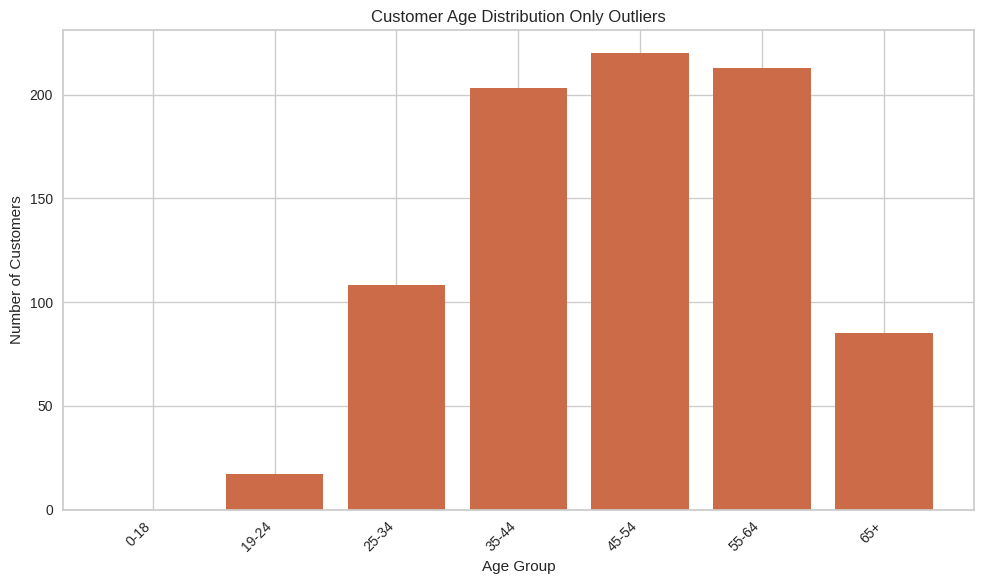

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have calculated the 'Age' column in data_only_outliers
# If not, you need to calculate it similar to how it was done in the previous cell:
# data_only_outliers["Age"] = 2016 - pd.to_datetime(data_only_outliers["Year_Birth"], format="%Y").apply(lambda x: x.year)

# 1. Define age group bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
labels = ['0-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Calculate the 'Age' column within the 'data_only_outliers' DataFrame if it doesn't exist
if 'Age' not in data_only_outliers.columns:
    data_only_outliers['Age'] = 2016 - pd.to_datetime(data_only_outliers['Year_Birth'], format='%Y').dt.year

# 2. Create the 'Age_Group' column using pd.cut
data_only_outliers['Age_Group'] = pd.cut(data_only_outliers['Age'], bins=bins, labels=labels, right=False)

# 3. Count the number of customers in each age group
age_group_counts = data_only_outliers['Age_Group'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(age_group_counts.index, age_group_counts.values, color="#cb6b47")  # Use plt.bar for vertical bars
plt.title('Customer Age Distribution Only Outliers')
plt.xlabel('Age Group')  # X-axis shows Age Group
plt.ylabel('Number of Customers')  # Y-axis shows the count
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Observation:**

- There are customers with an age greater than 115. Anomaly or drop these observations?

In [ ]:
# Drop the observations with age > 115
# Hint: Use drop() method with inplace=True
data_only_outliers.drop(data_only_outliers[data_only_outliers['Age'] > 115].index, inplace=True)

**Check the age distribution in the data.**

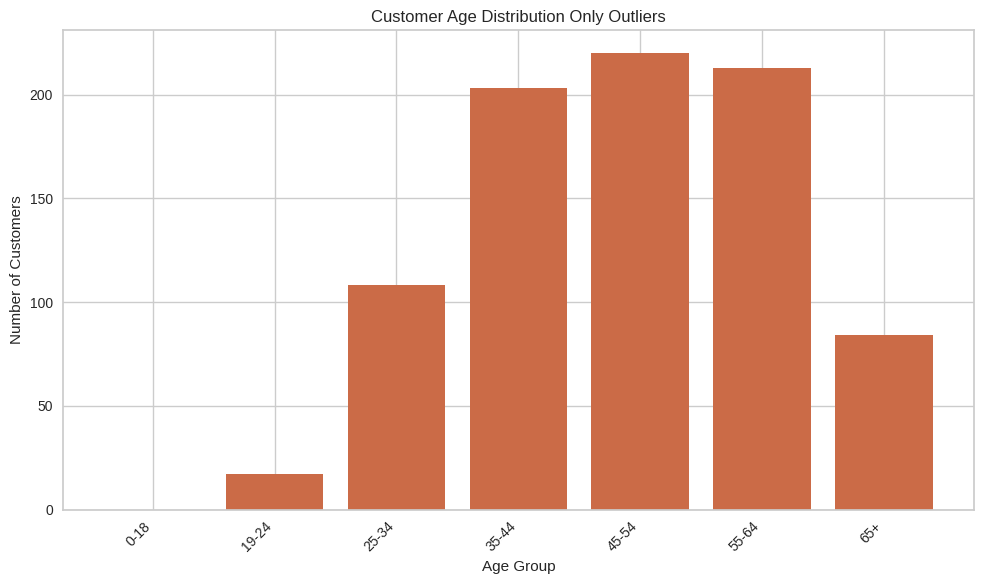

In [ ]:
# Plot histogram to check the distribution of age
# 1. Define age group bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
labels = ['0-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Calculate the 'Age' column within the 'data_only_outliers' DataFrame if it doesn't exist
if 'Age' not in data_only_outliers.columns:
    data_only_outliers['Age'] = 2016 - pd.to_datetime(data_only_outliers['Year_Birth'], format='%Y').dt.year

# 2. Create the 'Age_Group' column using pd.cut
data_only_outliers['Age_Group'] = pd.cut(data_only_outliers['Age'], bins=bins, labels=labels, right=False)

# 3. Count the number of customers in each age group
age_group_counts = data_only_outliers['Age_Group'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(age_group_counts.index, age_group_counts.values, color="#cb6b47")  # Use plt.bar for vertical bars
plt.title('Customer Age Distribution Only Outliers')
plt.xlabel('Age Group')  # X-axis shows Age Group
plt.ylabel('Number of Customers')  # Y-axis shows the count
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### **Kids**
* Create feature "Kids" indicating the total kids and teens in the home.

In [ ]:
# Add Kidhome and Teenhome variables to create the new feature called "Kids"
data_no_outliers["Kids"] = data_no_outliers["Kidhome"] + data_no_outliers["Teenhome"]

print(data_no_outliers["Kids"].max())

3


### **Family Size**
* Create a new variable called 'Family Size' to find out how many members each family has.
* Need to look at the Marital_Status variable, and see what are the categories.

In [ ]:
# Check the unique categories in Marial_Status
data_no_outliers["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

* Can combine the sub-categories Single, Divorced, Widow as "Single" and can combine the sub-categories Married and Together as "Relationship"
* Then, can create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Then, can use the Kids (calculated above) and the Status column to find the family size.

# **RE-RUNNING CODE? CHANGE NAME ON THIS BLOCK FROM HOUSEHOLD STATUS TO RELATIONSHIP STATUS AND DO NOT RUN THE BLOCK OF CODE UNDER IT WHICH IS THE ORIG RENAME BLOCK OF CODE**

In [ ]:
# Replace "Married" and "Together" with "Relationship"
data_no_outliers["Relationship"] = data_no_outliers["Marital_Status"].apply(lambda x: "Relationship" if x in ["Married", "Together"] else x)

# Replace "Divorced" and "Widow" with "Single"
data_no_outliers["Household_Status"] = data_no_outliers["Relationship"].apply(lambda x: "Single" if x in ["Divorced","Widow", "Alone",'YOLO'] else x)


print(data_no_outliers["Household_Status"].unique())


['Single' 'Relationship']


# **NEEDED TO RENAME THE HOUSEHOLD STATUS TO RELATIONSHIP STATUS SO I CAN USE THE HOUSEHOLD STATUS TO CODE BLOCKS BELOW**

In [ ]:
#rename the column
data_no_outliers = data_no_outliers.rename(columns={'Household_Status': 'Relationship_Status'})


print(data_no_outliers["Relationship_Status"].unique())

['Single' 'Relationship']


In [ ]:
#make the object column have numeric value with a new number column
data_no_outliers["Relationship_Status_Numeric"] = data_no_outliers['Relationship_Status'].replace({'Single': 1, 'Relationship': 2})

In [ ]:
# Create a new 'Family Size' column based on 'Relationship Status Numeric' + the 'Kids'

data_no_outliers["Family_Size"] = data_no_outliers["Relationship_Status_Numeric"] + data_no_outliers["Kids"]

print(data_no_outliers["Family_Size"].max())



5


### **Expenses**
* Create a new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [ ]:
# Create a new feature
# Add the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
# Create the 'Expenses' feature by summing up the amounts spent on different product categories
data_no_outliers["Expenses"] = data_no_outliers["MntWines"] + \
                             data_no_outliers["MntFruits"] + \
                             data_no_outliers["MntMeatProducts"] + \
                             data_no_outliers["MntFishProducts"] + \
                             data_no_outliers["MntSweetProducts"] + \
                             data_no_outliers["MntGoldProds"]

print(data_no_outliers["Expenses"].max())

1435


### **Total Purchases**
* Create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [ ]:
# Calculate NumTotalPurchases
data_no_outliers["NumTotalPurchases"] = data_no_outliers["NumDealsPurchases"] + \
                                      data_no_outliers["NumWebPurchases"] + \
                                      data_no_outliers["NumCatalogPurchases"] + \
                                      data_no_outliers["NumStorePurchases"]

# Create the 'AmountPerPurchase' feature, handling zero division
data_no_outliers["AmountPerPurchase"] = data_no_outliers["Expenses"] / data_no_outliers["NumTotalPurchases"].replace(0, 1) # Add this line

# Check the maximum value
max_amount_per_purchase = data_no_outliers["AmountPerPurchase"].max()
print(f"Maximum Amount Per Purchase: {max_amount_per_purchase}")


Maximum Amount Per Purchase: 137.0


### **Engaged in Days**
* Create a new feature called "Engaged in days", indicating how long the customer has been with the company.

**Check the max and min of the date.**

In [ ]:
# Check the minimum of the date
# Hint: Use the min() method

# Assuming data_no_outliers is your DataFrame and Dt_Customer is a datetime column
min_date = data_no_outliers["Dt_Customer"].min()

print(f"Minimum date in Dt_Customer: {min_date}")

Minimum date in Dt_Customer: 2012-01-08 00:00:00


In [ ]:
# Check the maximum of the date
# Hint: Use the max() method
max_date = data_no_outliers["Dt_Customer"].max()

print(f"Maximum date in Dt_Customer: {max_date}")

Maximum date in Dt_Customer: 2014-12-06 00:00:00


**Observation:**
- From the above output from the max function, observed that the last customer enrollment date is December 6th, 2014.

- Extract the number of days a customer has been with the company.

In [ ]:
import pandas as pd

# Assuming data_no_outliers is your DataFrame

# Convert 'Dt_Customer' to datetime
data_no_outliers["Dt_Customer"] = pd.to_datetime(data_no_outliers["Dt_Customer"])

# Calculate the most recent date in the Dt_Customer column
most_recent_date = data_no_outliers["Dt_Customer"].max()

# Calculate the number of days each customer has been with the company
data_no_outliers["DaysWithCompany"] = (most_recent_date - data_no_outliers["Dt_Customer"]).dt.days

# Print the maximum number of days (representing the longest-engaged customer)
max_days_with_company = data_no_outliers["DaysWithCompany"].max()
print(f'Maximum number of days a customer has been with the company: {max_days_with_company}')

# If you want to see the number of days for each customer:
# print(data_no_outliers[["Dt_Customer", "DaysWithCompany"]])


Maximum number of days a customer has been with the company: 1063


In [ ]:
# If you want to see the number of days for each customer:
print(data_no_outliers[["Dt_Customer", "DaysWithCompany"]])

     Dt_Customer  DaysWithCompany
0     2014-08-03              125
1     2014-10-02               65
2     2014-01-19              321
3     2013-09-09              453
4     2013-08-05              488
...          ...              ...
1331  2013-03-16              630
1332  2012-08-17              841
1333  2013-01-07              698
1334  2014-10-06               61
1335  2012-10-15              782

[1336 rows x 2 columns]


### **TotalAcceptedCmp**
* Create a new feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [ ]:
# Add all the campaign related variables to get the total number of accepted campaigns by a customer
# "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
data_no_outliers["TotalAcceptedCmp"] = ("AcceptedCmp1" + "AcceptedCmp2" + "AcceptedCmp3" + "AcceptedCmp4" + "AcceptedCmp5" + "Response")


# Select the columns related to campaign acceptance
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', "Response"]

# Calculate the total number of accepted campaigns for each customer
data_no_outliers['TotalAcceptedCmp'] = data_no_outliers[campaign_cols].sum(axis=1)

print(data_no_outliers["TotalAcceptedCmp"].max())


5


### **AmountPerPurchase**
* Create a new feature called "AmountPerPurchase" indicating the amount spent per purchase.

In [ ]:
# Create the 'AmountPerPurchase' feature
data_no_outliers["AmountPerPurchase"] = data_no_outliers["Expenses"] / data_no_outliers["NumTotalPurchases"]


# Replace infinity with NaN
data_no_outliers['AmountPerPurchase'] = data_no_outliers['AmountPerPurchase'].replace([np.inf, -np.inf], np.nan)

# Choose preferred NaN handling strategy (Option 1, 2, or 3 from the previous response)
# For example, to replace NaN with 0:
data_no_outliers['AmountPerPurchase'] = data_no_outliers['AmountPerPurchase'].fillna(0)
# ... (Or use Option 2 or 3 if preferred)


# Check the max value again
max_amount_per_purchase = data_no_outliers["AmountPerPurchase"].max()
print(f"Maximum Amount Per Purchase: {max_amount_per_purchase}")

data_no_outliers["AmountPerPurchase"].info()


print(data_no_outliers["AmountPerPurchase"].max())

Maximum Amount Per Purchase: 137.0
<class 'pandas.core.series.Series'>
RangeIndex: 1336 entries, 0 to 1335
Series name: AmountPerPurchase
Non-Null Count  Dtype  
--------------  -----  
1336 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB
137.0


# **before logarithmic transformation**

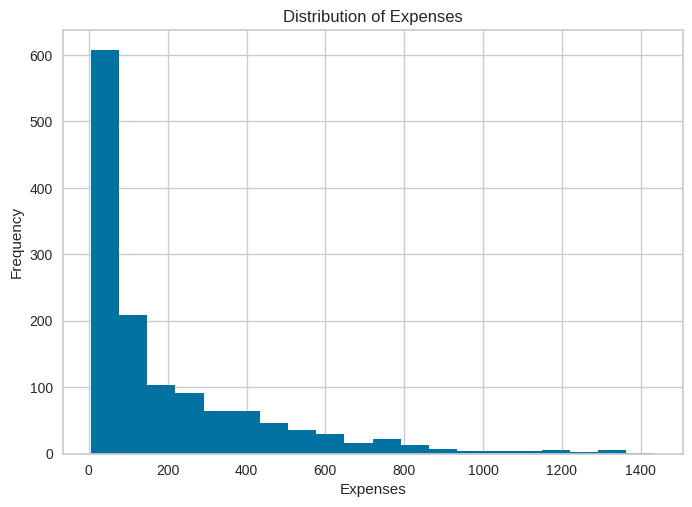

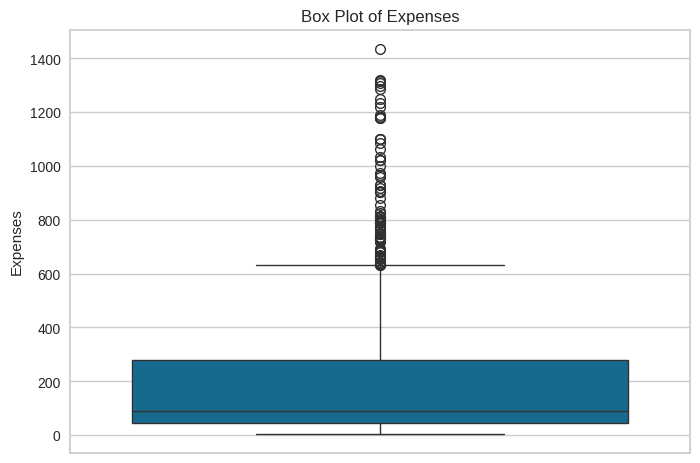

In [ ]:
 # Histogram
plt.hist(data_no_outliers["Expenses"], bins=20)
plt.title("Distribution of Expenses")
plt.xlabel("Expenses")
plt.ylabel("Frequency")
plt.show()

# Box plot
sns.boxplot(data_no_outliers["Expenses"])
plt.title("Box Plot of Expenses")
plt.show()

**Check the maximum value of the AmountPerPurchase.**

In [ ]:
# Option 1: Logarithmic Transformation
# Apply a logarithmic transformation to the "Expenses" column to compress the range of values
# This can help visualize the distribution more effectively when dealing with skewed data.
# Note: Ensure there are no zero or negative values before applying log transformation.
# Replace them with a small positive value if necessary (e.g., 1).
data_no_outliers['LogExpenses'] = np.log1p(data_no_outliers["Expenses"])  # Using log1p to handle potential zeros

check it

# **after logarithmic transformation**

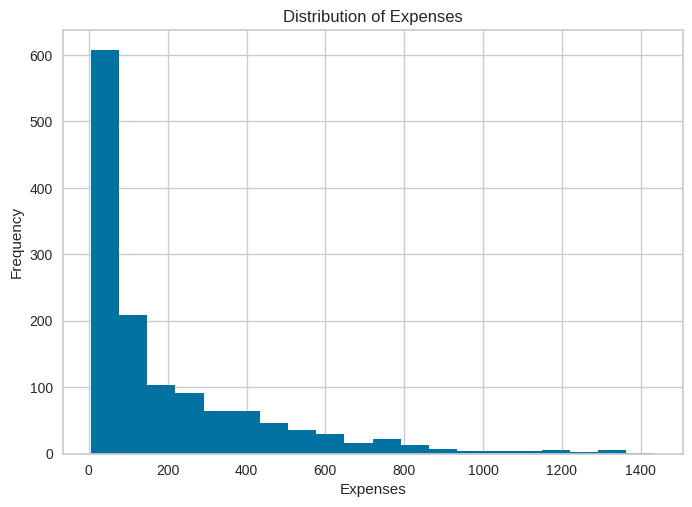

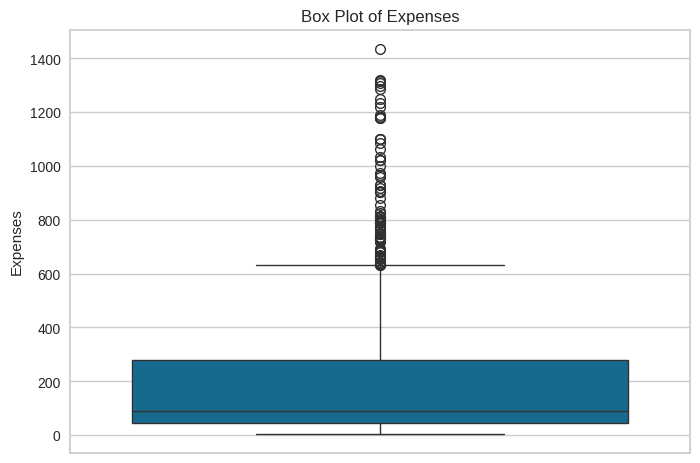

In [ ]:
 # Histogram
plt.hist(data_no_outliers["Expenses"], bins=20)
plt.title("Distribution of Expenses")
plt.xlabel("Expenses")
plt.ylabel("Frequency")
plt.show()

# Box plot
sns.boxplot(data_no_outliers["Expenses"])
plt.title("Box Plot of Expenses")
plt.show()

In [ ]:
# Check the max value
# Hint: Use max() function

# Get the maximum value of AmountPerPurchase
max_amount_per_purchase = data_no_outliers["AmountPerPurchase"].max()

# Print the maximum value
print(f"Maximum Amount Per Purchase: {max_amount_per_purchase}")

data_no_outliers["AmountPerPurchase"].info()


Maximum Amount Per Purchase: 137.0
<class 'pandas.core.series.Series'>
RangeIndex: 1336 entries, 0 to 1335
Series name: AmountPerPurchase
Non-Null Count  Dtype  
--------------  -----  
1336 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


# **Square root and cumulative distribution Function**

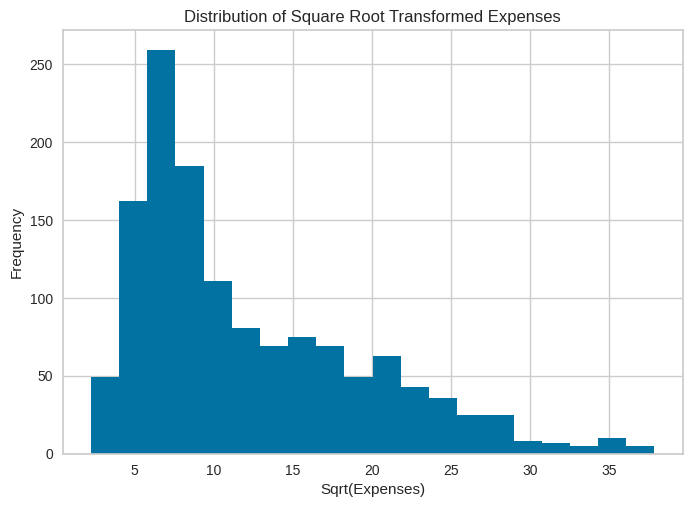

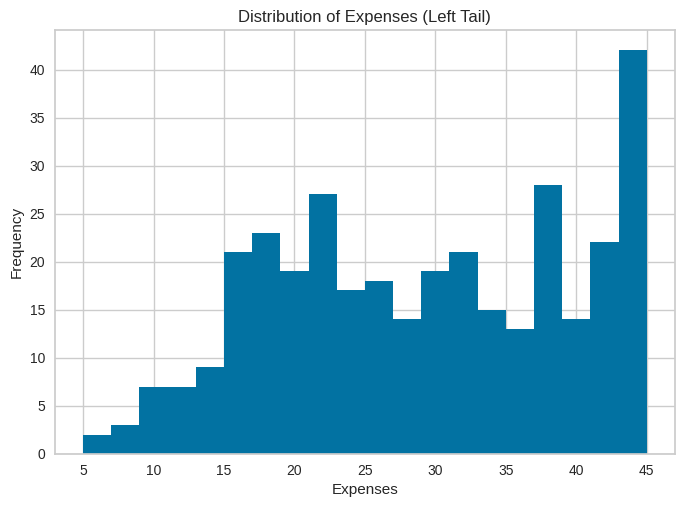

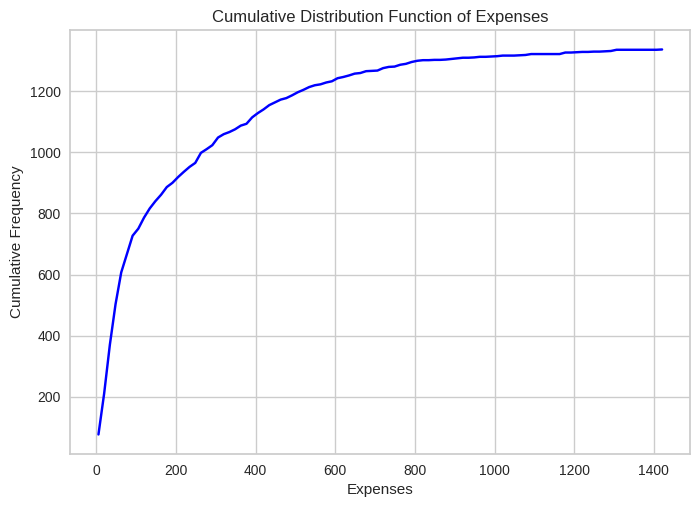

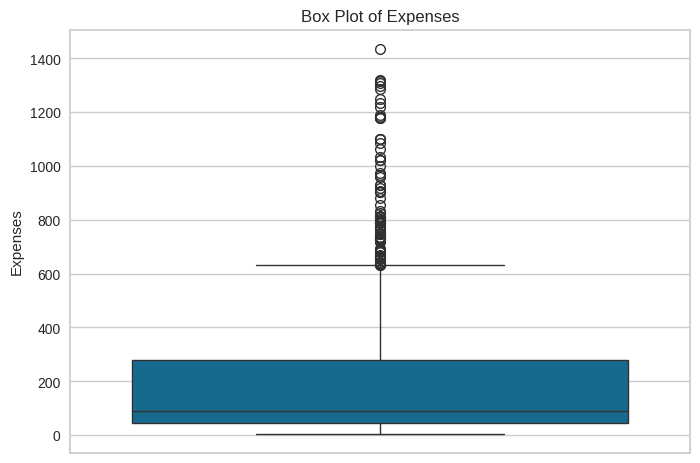

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Option 1: Square Root Transformation
# Apply a square root transformation to the "Expenses" column
# This can help reduce the impact of extreme values on the distribution.
data_no_outliers['SqrtExpenses'] = np.sqrt(data_no_outliers["Expenses"])

plt.hist(data_no_outliers["SqrtExpenses"], bins=20)
plt.title("Distribution of Square Root Transformed Expenses")
plt.xlabel("Sqrt(Expenses)")
plt.ylabel("Frequency")
plt.show()


# Option 2:  Focus on the Left Tail
# If the left tail is of particular interest, create a zoomed-in histogram for that region.
# Determine a cutoff point for the left tail (e.g., the 25th percentile)
cutoff = np.percentile(data_no_outliers["Expenses"], 25)

# Filter data for the left tail
left_tail_data = data_no_outliers[data_no_outliers["Expenses"] <= cutoff]

# Create histogram for the left tail
plt.hist(left_tail_data["Expenses"], bins=20)
plt.title("Distribution of Expenses (Left Tail)")
plt.xlabel("Expenses")
plt.ylabel("Frequency")
plt.show()


# Option 3:  Cumulative Distribution Function (CDF)
# Visualize the data using a CDF, which can be helpful for understanding the distribution
# of values, especially when dealing with skewed data.

# Calculate the CDF
values, base = np.histogram(data_no_outliers["Expenses"], bins=100)
cumulative = np.cumsum(values)

# Plot the CDF
plt.plot(base[:-1], cumulative, c='blue')
plt.title("Cumulative Distribution Function of Expenses")
plt.xlabel("Expenses")
plt.ylabel("Cumulative Frequency")
plt.show()


# Option 4 (Box Plot for Outliers - Already Included):
# Visualize the distribution and identify potential outliers using a box plot.
sns.boxplot(data_no_outliers["Expenses"])
plt.title("Box Plot of Expenses")
plt.show()

# **Still large outliers - handle directly with Winsorizing**

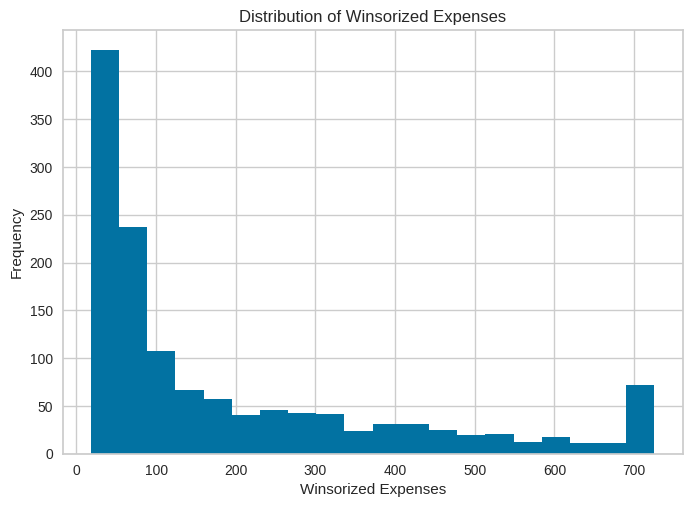

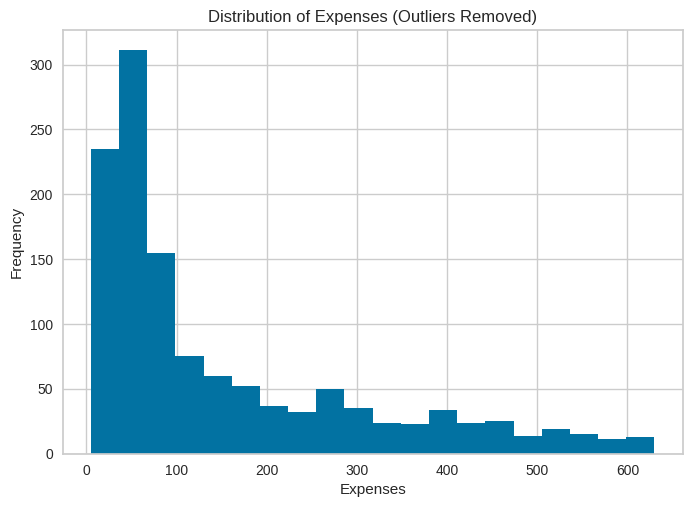

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Option 1: Winsorizing
# Winsorizing is a technique to limit extreme values by replacing them with less extreme values.
# It helps reduce the influence of outliers while preserving the overall data structure.

# Determine the percentiles for winsorizing (e.g., 5th and 95th percentiles)
lower_limit = np.percentile(data_no_outliers["Expenses"], 5)
upper_limit = np.percentile(data_no_outliers["Expenses"], 95)

# Winsorize the "Expenses" column
data_no_outliers["WinsorizedExpenses"] = np.clip(data_no_outliers["Expenses"], lower_limit, upper_limit)

# Create histogram for the winsorized data
plt.hist(data_no_outliers["WinsorizedExpenses"], bins=20)
plt.title("Distribution of Winsorized Expenses")
plt.xlabel("Winsorized Expenses")
plt.ylabel("Frequency")
plt.show()

# Option 2: Removing Outliers (with caution)
# Removing outliers should be done carefully and with justification.
# First, define a threshold for identifying outliers (e.g., using IQR)
Q1 = data_no_outliers["Expenses"].quantile(0.25)
Q3 = data_no_outliers["Expenses"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data_no_outliers[(data_no_outliers["Expenses"] >= lower_bound) & (data_no_outliers["Expenses"] <= upper_bound)]

# Create histogram for the filtered data
plt.hist(filtered_data["Expenses"], bins=20)
plt.title("Distribution of Expenses (Outliers Removed)")
plt.xlabel("Expenses")
plt.ylabel("Frequency")
plt.show()

# **recheck again**

In [ ]:
# Check the max value
# Hint: Use max() function

# Get the maximum value of AmountPerPurchase
max_amount_per_purchase = data_no_outliers["AmountPerPurchase"].max()

# Print the maximum value
print(f"Maximum Amount Per Purchase: {max_amount_per_purchase}")

data_no_outliers["AmountPerPurchase"].info()

Maximum Amount Per Purchase: 137.0
<class 'pandas.core.series.Series'>
RangeIndex: 1336 entries, 0 to 1335
Series name: AmountPerPurchase
Non-Null Count  Dtype  
--------------  -----  
1336 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


**Observations:**

The value of 0 is not useable and can be dropped.

In [ ]:
# Find how many observations have NumTotalPurchases equal to 0

# Count observations with NumTotalPurchases equal to 0
num_zero_purchases = data_no_outliers[data_no_outliers["NumTotalPurchases"] == 0].shape[0]

# Print the result
print(f"Number of observations with NumTotalPurchases equal to 0: {num_zero_purchases}")


Number of observations with NumTotalPurchases equal to 0: 2


In [ ]:
# Drop the observations with NumTotalPurchases equal to 0, using their indices

# Get the indices of observations with NumTotalPurchases equal to 0
indices_to_drop = data_no_outliers[data_no_outliers["NumTotalPurchases"] == 0].index

# Drop the observations using the indices
data_no_outliers = data_no_outliers.drop(indices_to_drop)

# Optionally, reset the index if needed
data_no_outliers = data_no_outliers.reset_index(drop=True)

**Check the distribution of values in AmountPerPurchase column.**

In [ ]:
# Round AmountPerPurchase to 2 decimal places using NumPy
data_no_outliers["AmountPerPurchase"] = np.around(data_no_outliers["AmountPerPurchase"], decimals=2)

# Check the summary statistics again (optional)
summary_stats = data_no_outliers["AmountPerPurchase"].describe()
print(summary_stats)

count    1334.000000
mean       14.879565
std        10.904117
min         0.530000
25%         7.000000
50%        11.700000
75%        20.640000
max       137.000000
Name: AmountPerPurchase, dtype: float64


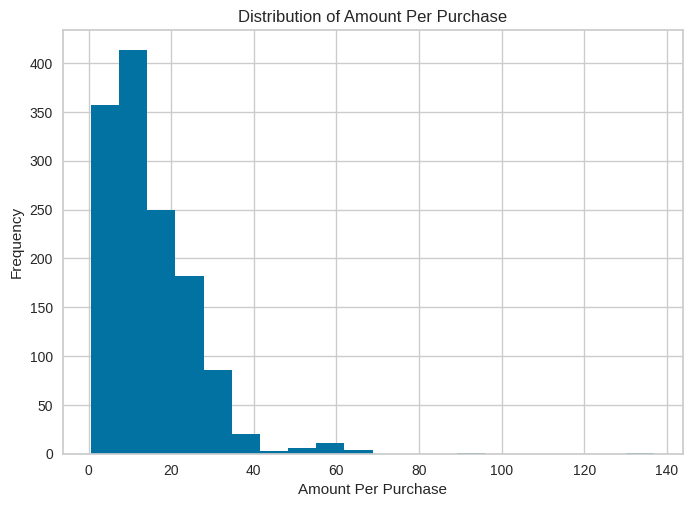

In [ ]:
# Plot the histogram for the AmountPerPurchas variable

# Plot the histogram
plt.hist(data_no_outliers["AmountPerPurchase"], bins=20)  # Adjust bins as needed
plt.title("Distribution of Amount Per Purchase")
plt.xlabel("Amount Per Purchase")
plt.ylabel("Frequency")
plt.show()


### **Imputing Missing Values**

In [ ]:
# Impute the missing values for the Income variable with the median


# Impute missing values with the median
data_no_outliers["Income"].fillna(median_income, inplace=True)

# Calculate the median of the Income variable
median_income = data_no_outliers["Income"].median()

print(f'median of the Income variable: {median_income}')

# Impute missing values with the median
data_no_outliers["Income"].fillna(median_income, inplace=True)

print(f'max missing median income values: {data_no_outliers["Income"].max()}')
print(f'min missing median income values: {data_no_outliers["Income"].min()}')




median of the Income variable: 38643.0
max missing median income values: 96547.0
min missing median income values: 1730.0


**Done with data preprocessing.

Visualize new features against the new income variable after imputing missing values.**

### **Income Vs Expenses**

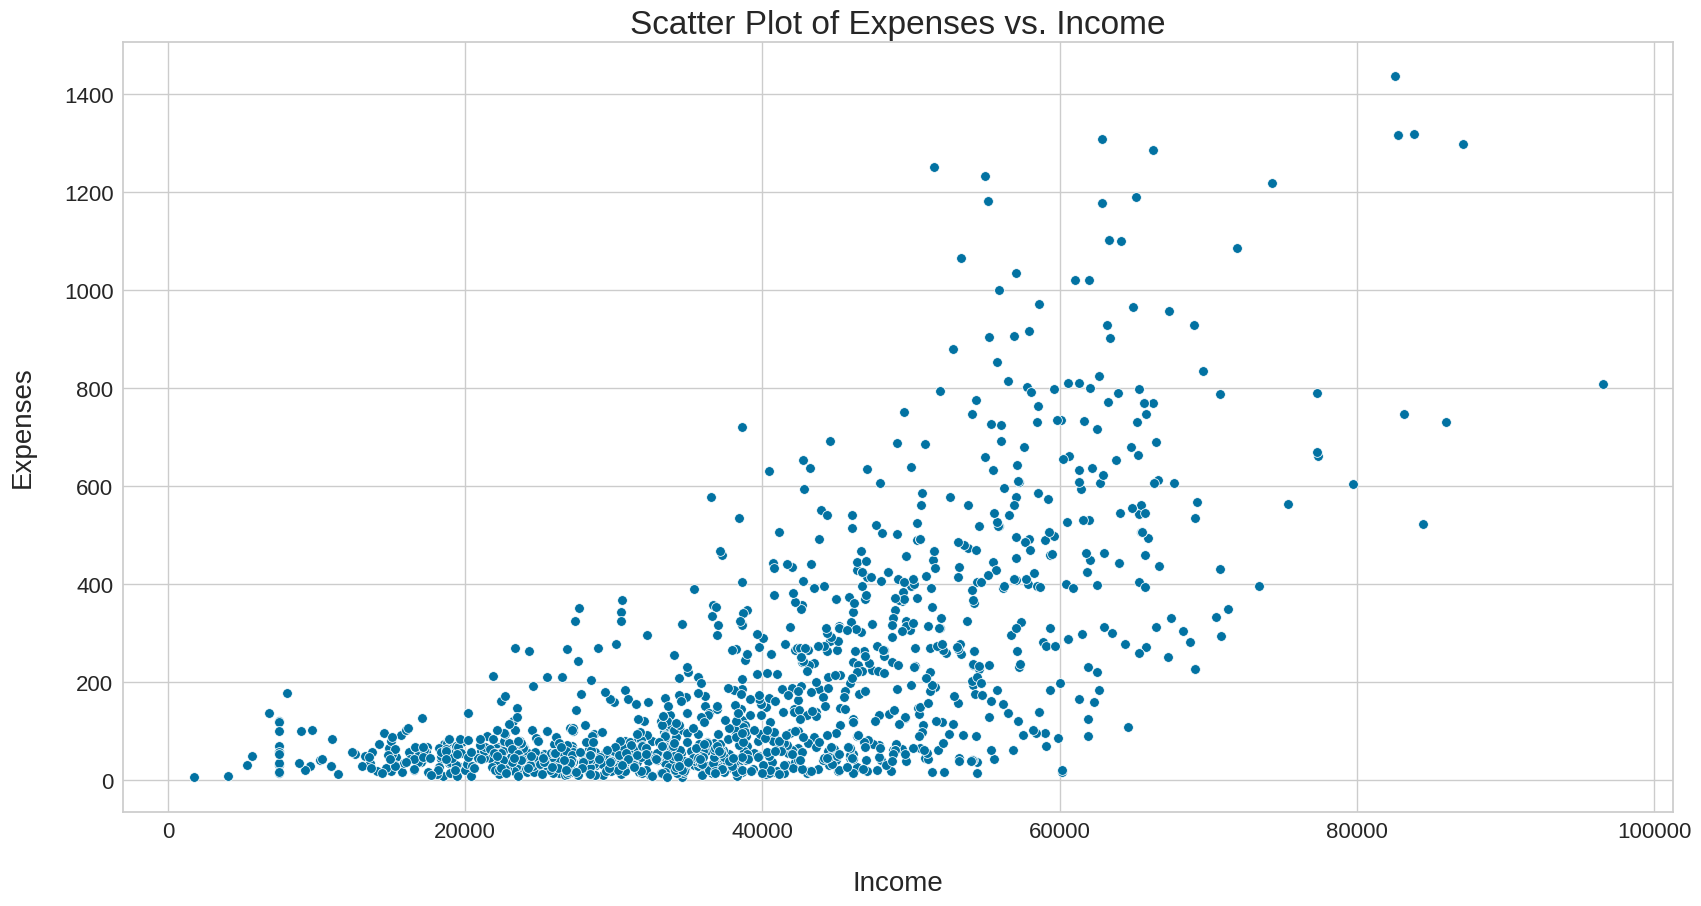

In [ ]:
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis

plt.figure(figsize=(20, 10))                                   # Setting the plot size

sns.scatterplot(x="Income", y="Expenses", data=data_no_outliers) # Using sns.scatterplot()

plt.xticks(fontsize=16)                                        # Font size of X-label
plt.yticks(fontsize=16)                                        # Font size of Y-label
plt.xlabel("Income", fontsize=20, labelpad=20)                  # Font size and padding of X-label
plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Font size and padding of Y-label
plt.title("Scatter Plot of Expenses vs. Income", fontsize=24)   # Title with font size
plt.show()


# Observations and Insights: There is a positive correlation between income and expenses. As income increases, so do expenses. There is a strong c between income and expensed in the 150k - 425k income range. We can be confident that one feature will directly affect the other.

Weak Correlation: If the points are more spread out, it indicates a weaker correlation.**

### **Family Size Vs Income**

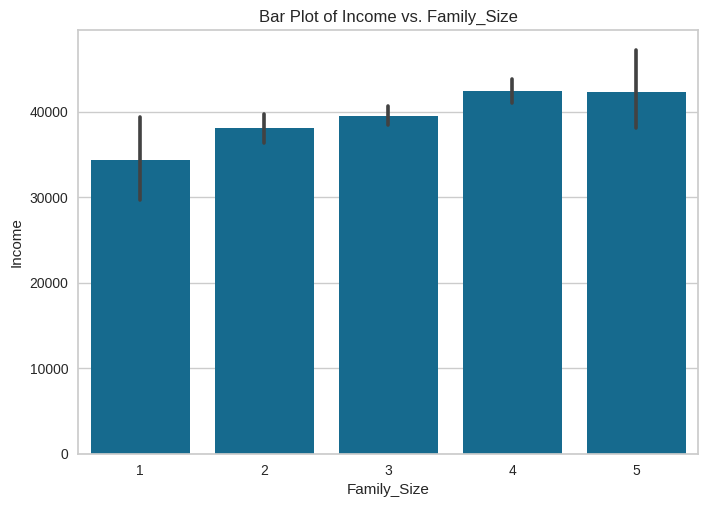

In [ ]:
# Plot the bar plot for Family Size on X-axis and Income on Y-axis

# Create the bar plot
sns.barplot(x="Family_Size", y="Income", data=data_no_outliers) # Pass data_no_outliers to the 'data' argument
plt.title("Bar Plot of Income vs. Family_Size")
plt.xlabel("Family_Size")
plt.ylabel("Income")
plt.show()

### **Observations and Insights: A larger family size contributes to an increase in income. According to previous uniuque values, the larger households are consistent with those in a relationship status where more than one adult is contributing to the household income.**


## **Important Insights from EDA and Data Preprocessing**



## Preparing Data for Segmentation

### Dropping columns not usng for segmentation

Decision on which variables to use for clustering is an important decision that will have a big impact on the clustering solution. Need to think carefully about the variables to choose for clustering.

Often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.

Here, use the behavioral attributes for segmentation and drop the demographic attributes like Income, Age, and Family_Size. Also need to drop some other columns, mentioned below.

* `Dt_Customer`: We have created the `Engaged_in_days` variable using the Dt_Customer variable. Can drop this variable. It will not help with segmentation.
* `Complain`: About 95% of the customers didn't complain and have the same value for this column. This variable will not have a major impact on segmentation. Drop this variable.
* `day`:  Created the `Engaged_in_days` variable using the 'day' variable. Drop this variable. It will not help with segmentation.
* `Status`: This column was created just to get the `Family_Size` variable that contains the information about the Status. Can drop this variable.
* Also need to drop categorical variables like `Education` and `Marital_Status`, `Kids`, `Kidhome`, and `Teenhome` because distance-based algorithms cannot use the default distance like Euclidean to find the distance between categorical and numerical variables.
* Can also drop categorical variables like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response`. Created the variable `TotalAcceptedCmp`, which is the aggregate of all these variables.

# ## OLD CODE NOT WORKING LEAVE FOR REFERENCE

In [ ]:
# Dropping all the irrelevant columns and storing in data_model
data_model = data_no_outliers.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "day",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Status",
        "Kids",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Age', 'Family_Size'
    ],
    axis=1,
)

KeyError: "['day', 'Status', 'Age'] not found in axis"

In [ ]:
# Dropping all the irrelevant columns and storing in data_model
# Check the actual column names in the data_no_outliers DataFrame using:
# print(data_no_outliers.columns)
# This will print a list of all the columns in the DataFrame.

# Ensure that the column names in the 'columns' list below match
# the actual column names in the DataFrame.

# If the columns are not present, remove them from the list.
# For example, if 'day', 'Status', and 'Age' are not present,
# remove them from the list like this:
data_model = data_no_outliers.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Kids",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Family_Size' # Removed 'day', 'Status', and 'Age'
    ],
    axis=1,
)

In [ ]:
# Check the shape of new data
data_model.shape

(1334, 27)

In [ ]:
# Check first five rows of new data
data_model.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Relationship_Status_Numeric,Expenses,NumTotalPurchases,AmountPerPurchase,DaysWithCompany,Engaged_in_days,TotalAcceptedCmp,LogExpenses,SqrtExpenses,WinsorizedExpenses
0,2174,38,11,1,6,2,1,6,2,1,...,1,27,6,4.50,125,125,0,3.332205,5.196152,27.0
1,6182,26,11,4,20,10,3,5,2,2,...,2,53,8,6.62,65,65,0,3.988984,7.280110,53.0
2,5324,94,173,43,118,46,27,15,5,5,...,2,422,19,22.21,321,321,0,6.047372,20.542639,422.0
3,7446,16,520,42,98,0,42,14,2,6,...,2,716,22,32.55,453,453,0,6.575076,26.758176,716.0
4,6177,32,76,10,56,3,1,23,2,4,...,2,169,10,16.90,488,488,0,5.135798,13.000000,169.0


**Plot the correlation plot after irrelevant variables were removed.**

In [ ]:
income_range = "0K-25K"
lower, upper = income_range.replace("K", "").split("-")  # Remove 'K', split by '-'
lower_float = float(lower) * 1000  # Convert to float, multiply by 1000
upper_float = float(upper) * 1000  # Convert to float, multiply by 1000
print(lower_float, upper_float)  # Output: 0.0 - 25000.0

# If desired, calculate average (or use a different representation)
average_income = (lower_float + upper_float) / 2
print(average_income) # Output: 37500.0

0.0 25000.0
12500.0


In [ ]:
income_range = "25k-50k"
lower, upper = income_range.replace("k", "").split("-")  # Remove 'k', split by '-'
lower_float = float(lower) * 1000  # Convert to float, multiply by 1000
upper_float = float(upper) * 1000  # Convert to float, multiply by 1000
print(lower_float, upper_float)  # Output: 25000.0 50000.0

# If desired, calculate average (or use a different representation)
average_income = (lower_float + upper_float) / 2
print(average_income) # Output: 37500.0

25000.0 50000.0
37500.0


In [ ]:
income_range = "50k-75k"
lower, upper = income_range.replace("k", "").split("-")  # Remove 'k', split by '-'
lower_float = float(lower) * 1000  # Convert to float, multiply by 1000
upper_float = float(upper) * 1000  # Convert to float, multiply by 1000
print(lower_float, upper_float)  # Output: 25000.0 50000.0

# If desired, calculate average (or use a different representation)
average_income = (lower_float + upper_float) / 2
print(average_income) # Output: 37500.0

50000.0 75000.0
62500.0


In [ ]:
income_range = "75k-100k"
lower, upper = income_range.replace("k", "").split("-")  # Remove 'k', split by '-'
lower_float = float(lower) * 1000  # Convert to float, multiply by 1000
upper_float = float(upper) * 1000  # Convert to float, multiply by 1000
print(lower_float, upper_float)  # Output: 25000.0 50000.0

# If desired, calculate average (or use a different representation)
average_income = (lower_float + upper_float) / 2
print(average_income) # Output: 37500.0

75000.0 100000.0
87500.0


# **ERROR CODE - DONT USE KEEP FOR REFERENCE **

In [ ]:
# Plot the correlation plot for new data
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(data_model.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Marketing Campaign Data')
plt.show()

ValueError: could not convert string to float: '25k-50k'

<Figure size 1200x1000 with 0 Axes>

In [ ]:
# Assuming 'IncomeRange' is the column with income ranges
# Extract numeric values from the income range strings
def extract_average_income(income):
  """
  Extracts the average income from an income range string.

  Args:
    income_range: A string representing the income range (e.g., '25k-50k').

  Returns:
    The average income as a float, or NaN if the income range is invalid.
  """
  try:
    lower, upper = income.replace("k", "").replace("K", "").split("-")  # Remove 'k' or 'K', split by '-'
    lower_float = float(lower) * 1000  # Convert to float, multiply by 1000
    upper_float = float(upper) * 1000  # Convert to float, multiply by 1000
    return (lower_float + upper_float) / 2  # Calculate average
  except (ValueError, AttributeError):
    return float('nan')  # Handle invalid income ranges

# Apply the function to the 'IncomeRange' column and create a new column
data_model['AverageIncome'] = data_model['Income'].apply(extract_average_income)

# Now you can calculate the correlation using the new numeric column
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(data_model.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Marketing Campaign Data')
plt.show()

KeyError: 'Income'

In [ ]:
# Assuming 'IncomeRange' or a similar name is the actual column with income ranges
income_column_name = 'IncomeRange'  # Replace with the actual column name if different

# Apply the function to the correct column and create a new column
data_model['AverageIncome'] = data_model[income_column_name].apply(extract_average_income)

# Now you can calculate the correlation using the new numeric column
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(data_model.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Marketing Campaign Data')
plt.show()

KeyError: 'IncomeRange'

## **Conclusion and Recommendations**

**1.What models performed best based on goal needing to acomplish?**:

- The heat map gave clear correlations between categories.

- K Means clearly showed 3 saturated categories of customers.

**2. Refined insights**:

- There are 2 sets of strongly correlated categories which hold the most monetary value.
 - food and wine
 - deals and online